In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import pandas as pd
import sys

'''
src_path = sys.path[0].replace("figures\visualization\script", "src")
#replace notebook as scripts
data_path = sys.path[0].replace("figures\visualization\script", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures\visualization\script", "output")
'''

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
}
mpl.rcParams.update(rc_)

from plot_helper import *
from XGBoost_helper import Prediction_evaluation

l:\Softwares\Anaconda\envs\gurobi\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# plot price_dc and opex

In [38]:
path_dc_line=r'D:\Codes\GIthub_repo\Energy_grid\output\experiments\Aug2023_debug2\debug_for_vi.xlsx'
df_dc_line=pd.read_excel(path_dc_line)
df_dc=pre_process_dc_line(df_dc_line)
df_temp=df_dc.get_group('2-1-0-0 to 2-2-0-0')

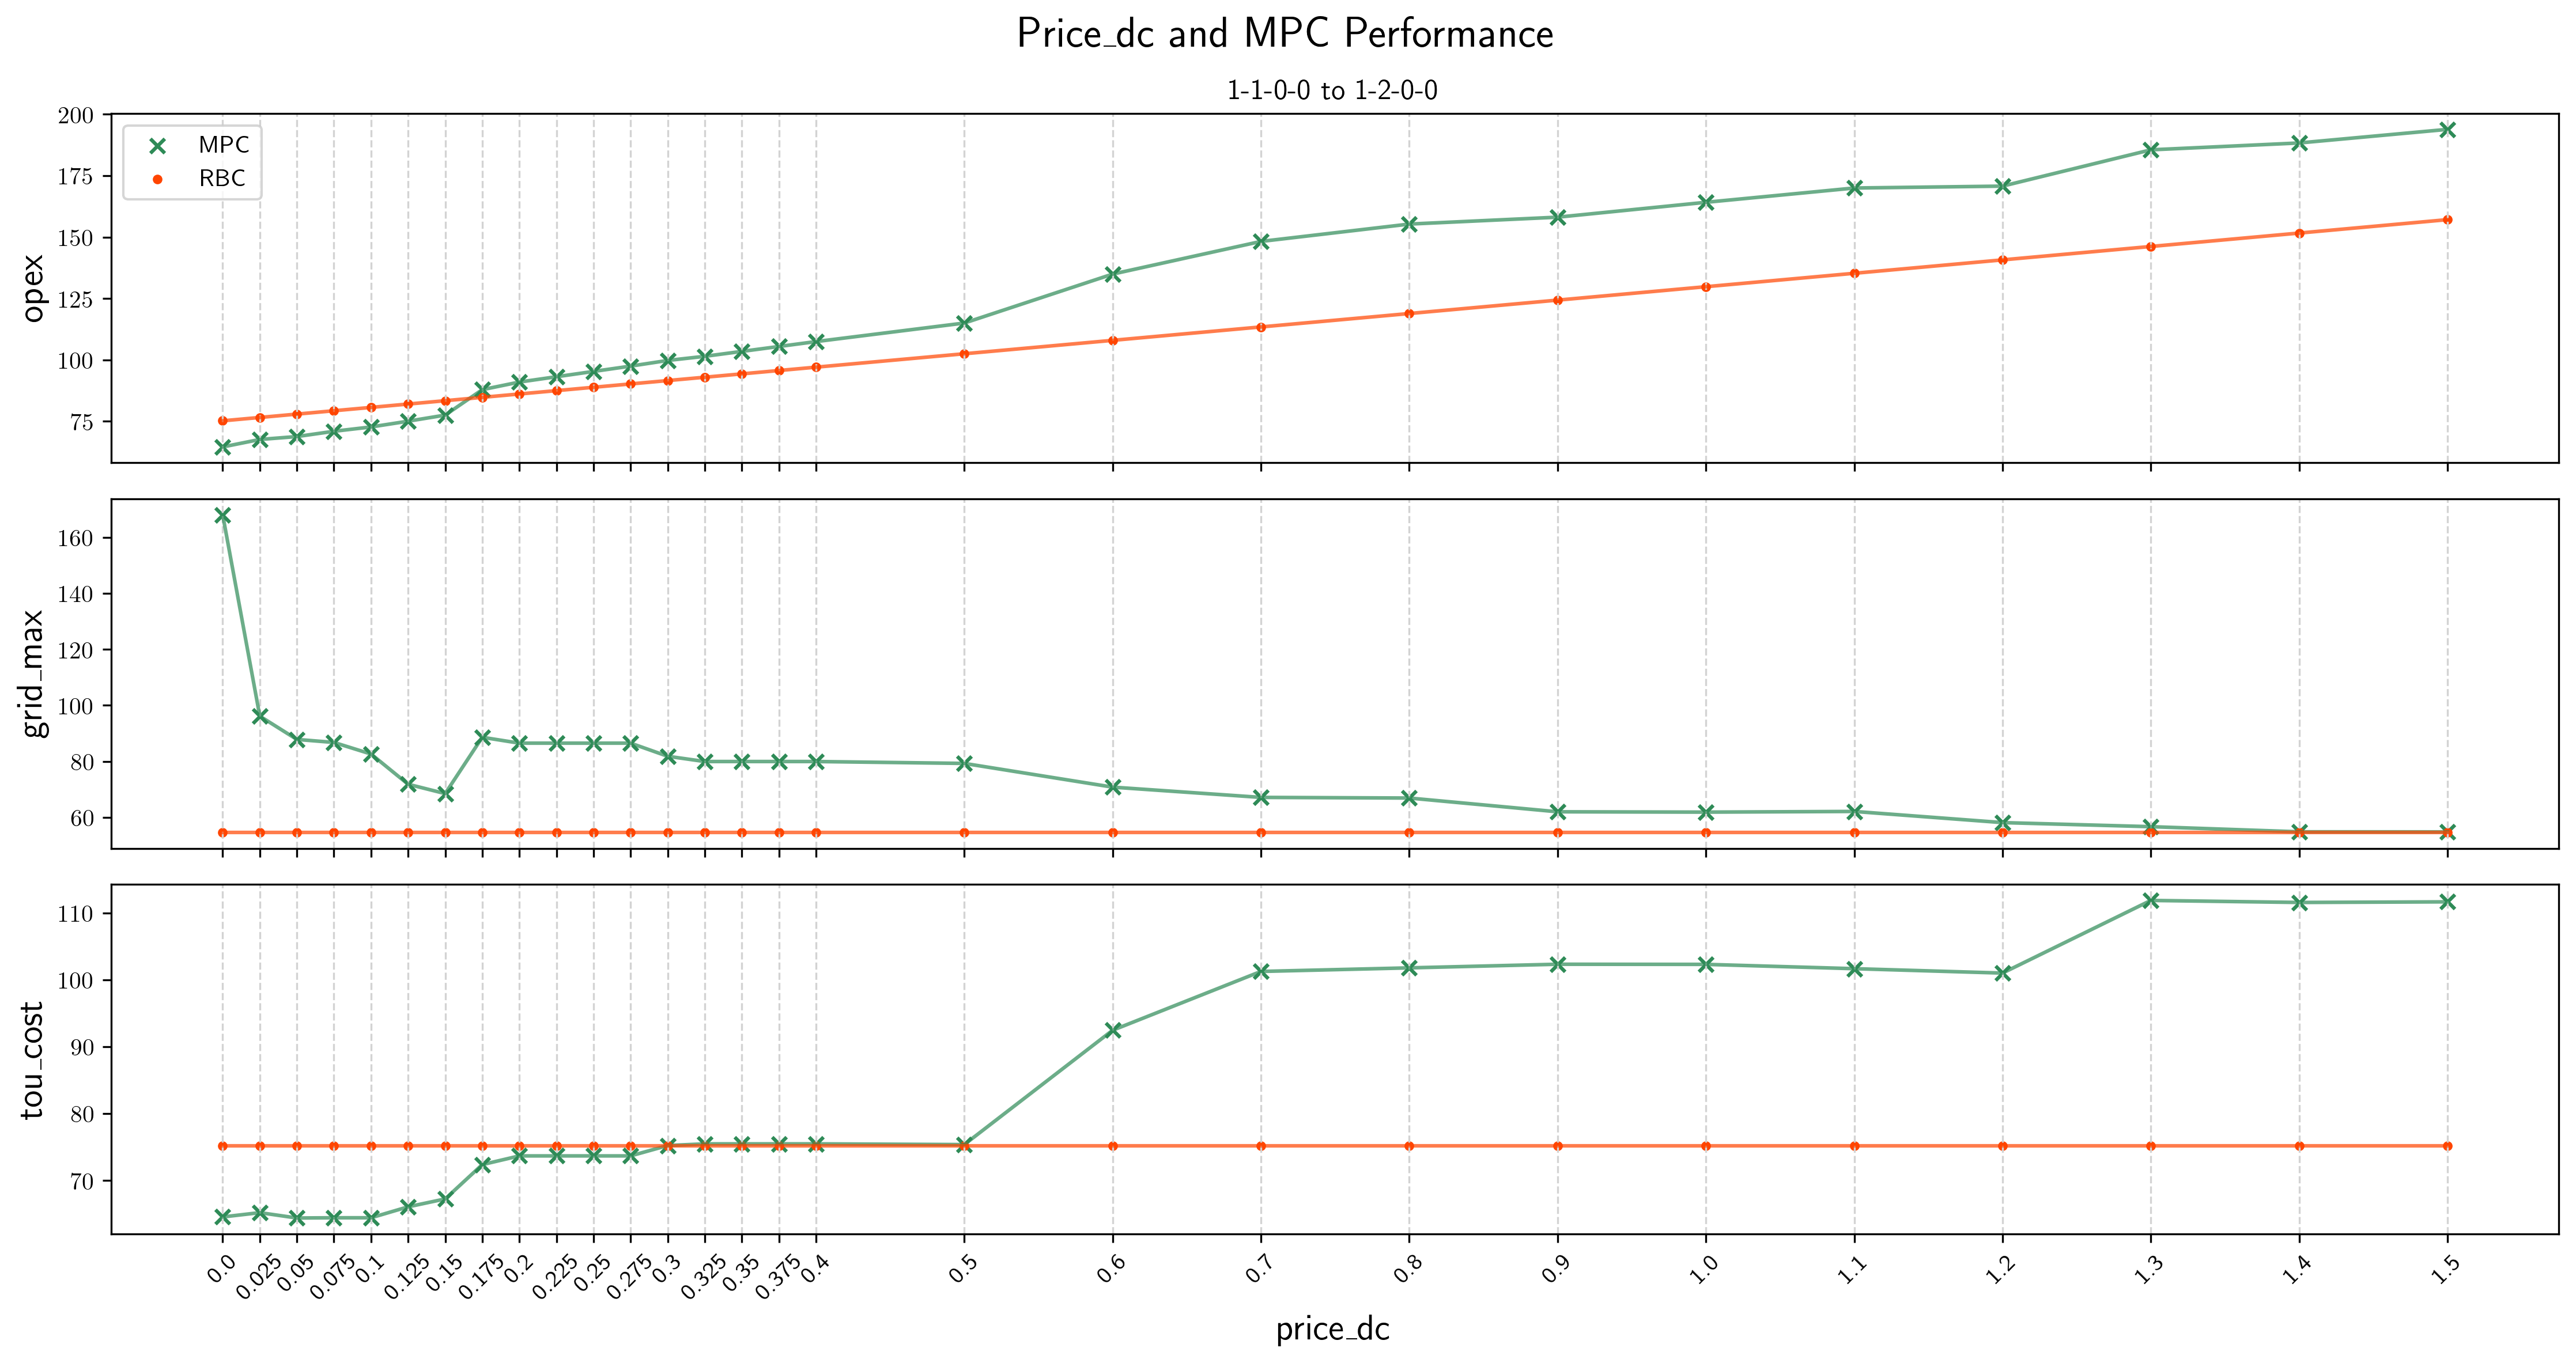

In [44]:
plot_dc_line_group(df_dc,
                   ['1-1-0-0 to 1-2-0-0'],
                   ['opex','grid_max','tou_cost'],
                   'price_dc',
                   "Price_dc and MPC Performance",
                   [15,8])

# plot of exp: 0824 bug fixed (rewrite the executing process)
# dc_price=0.6

In [2]:
# load data

path='D:\Codes\Energy_grid_new\output\experiments\Aug2023_3\LOG-MPC-MSC-6h-bat-52weeks.xlsx'
df=pd.read_excel(path)
df_opex=pre_process(df,'OPEX')
df_tou=pre_process(df,"tou_cost")

    strategy  pred_model  week_of_year        OPEX           label  \
0        MPC          GT             1  203.651777          MPC-GT   
1        MPC  Prediction             1  204.843311  MPC-Prediction   
2        MPC   Heuristic             1  203.133219   MPC-Heuristic   
3        MPC       Naive             1  216.303595       MPC-Naive   
4        MSC          GT             1  259.307026          MSC-GT   
..       ...         ...           ...         ...             ...   
274      MPC  Prediction            52  146.912625  MPC-Prediction   
275      MPC          GT            52  143.236466          MPC-GT   
276      MPC  Prediction            52  146.551551  MPC-Prediction   
277      MPC          GT            52  143.143555          MPC-GT   
278      MPC  Prediction            52  146.132750  MPC-Prediction   

     relative_OPEX  
0         0.000000  
1         2.140920  
2        -0.931734  
3        22.732479  
4       100.000000  
..             ...  
274       9.

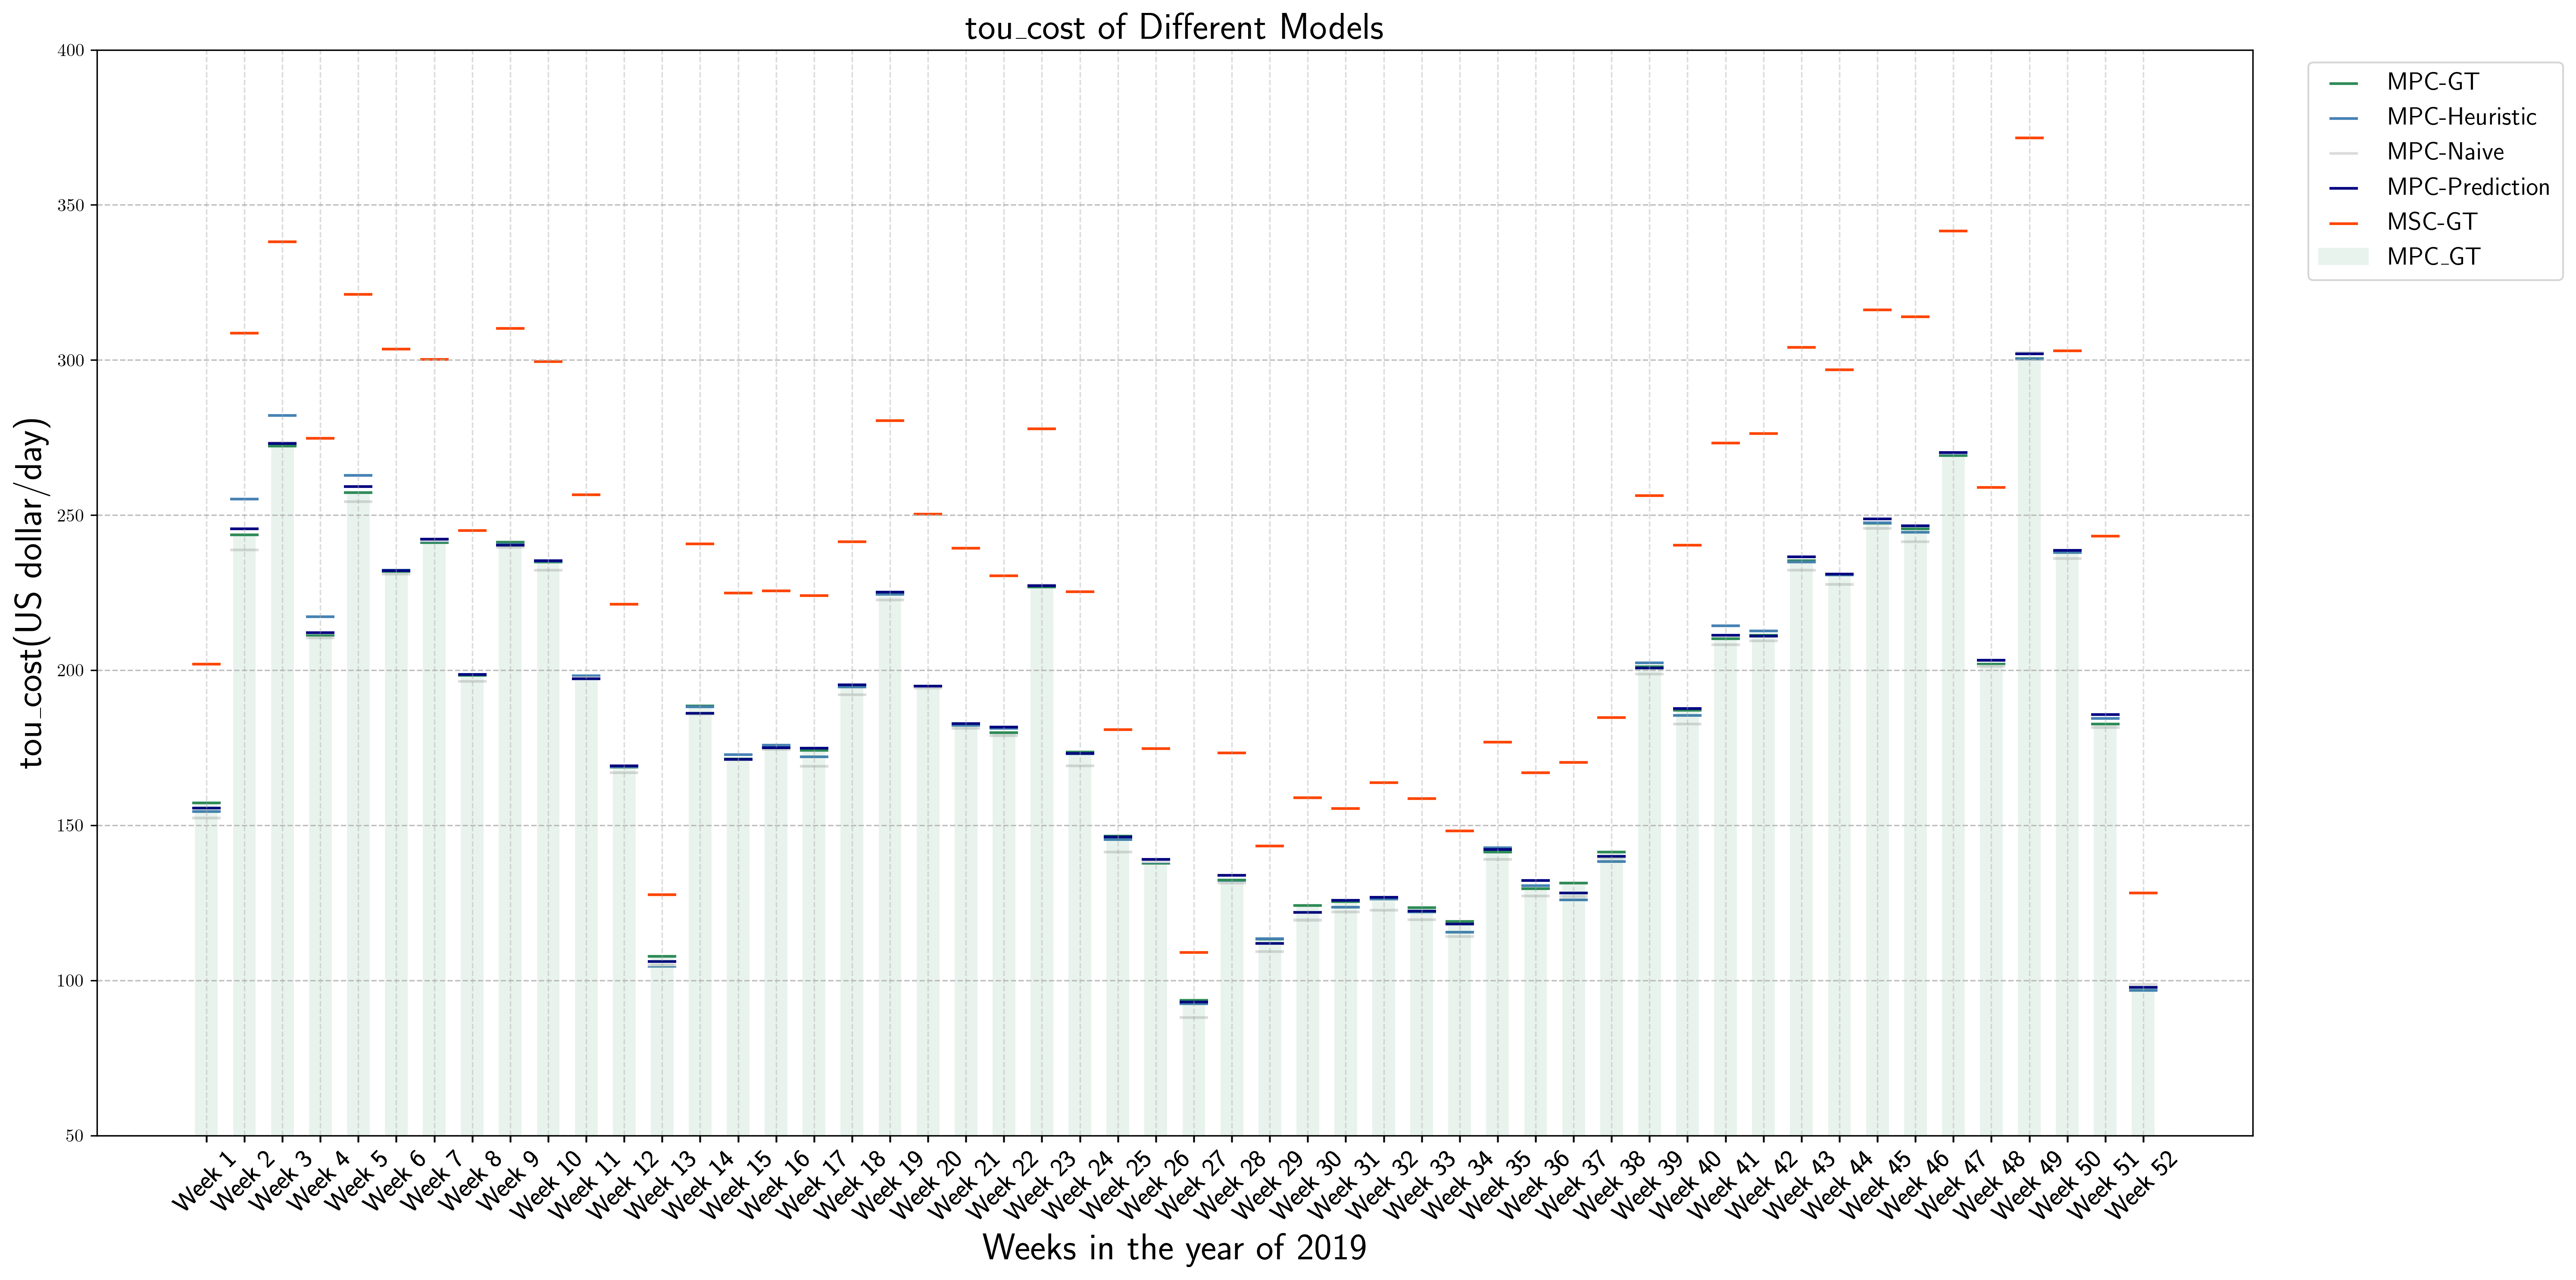

In [4]:
limit=[50,400]
figsize=(20,10)
plot_origin_valid_bar(df_tou,False,limit,figsize,'tou_cost','0824_tou_byweek_bug_fixed.png',14)

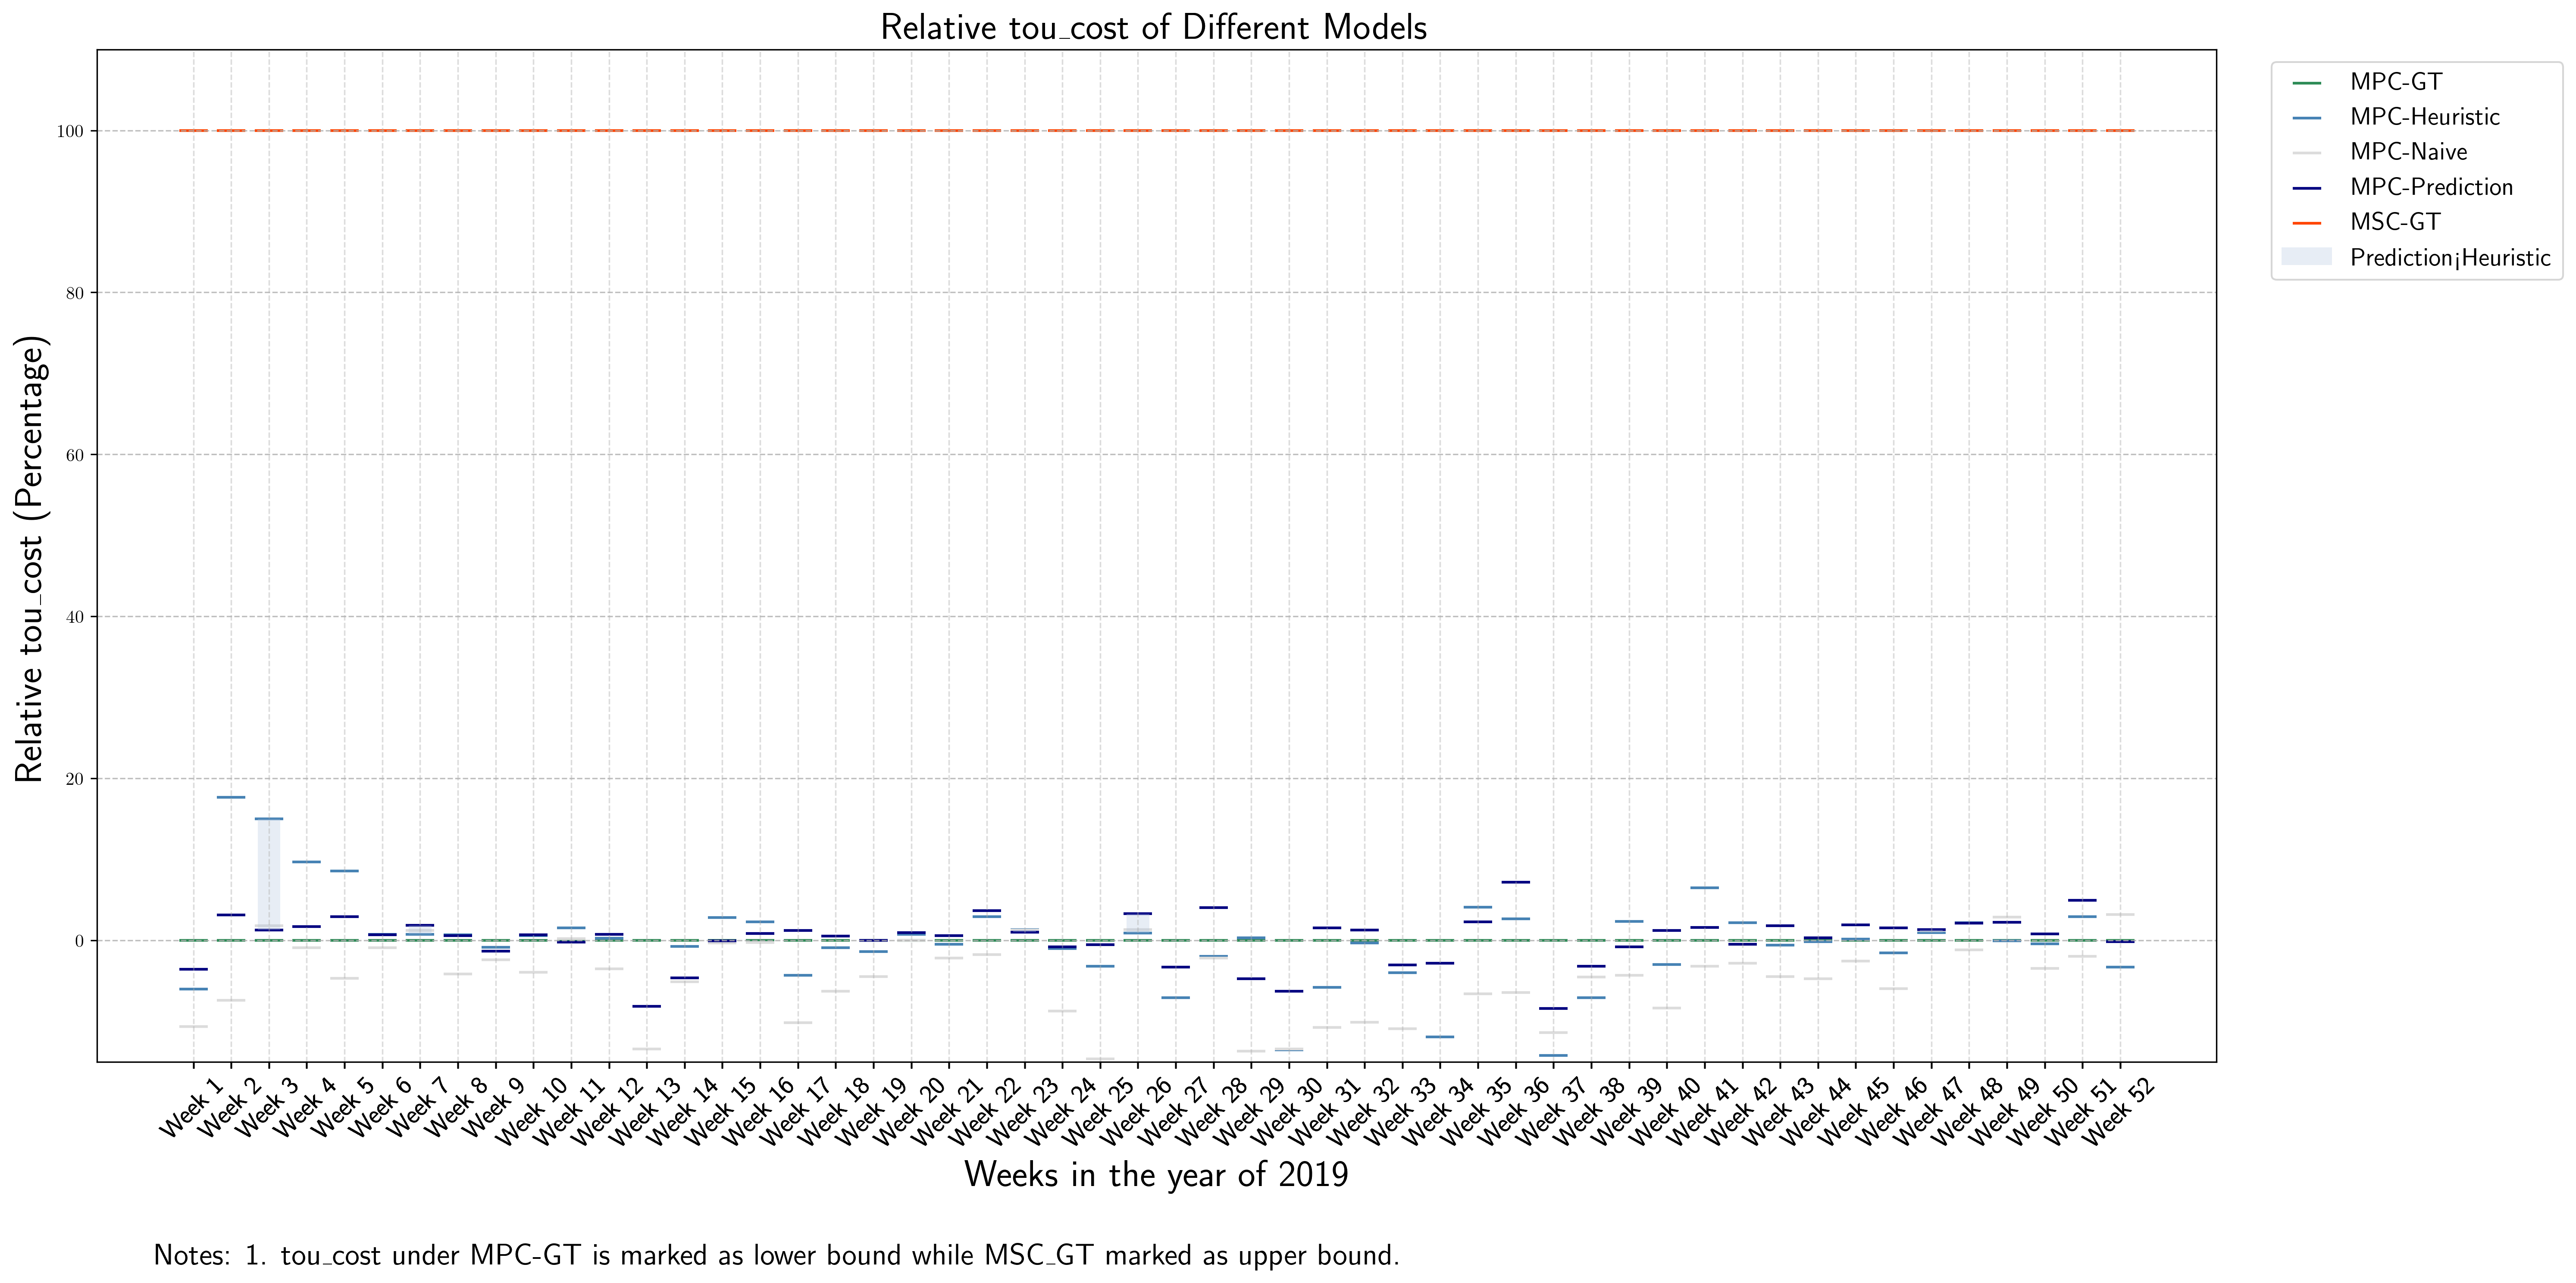

In [5]:
limit=[-15,110]
figsize=(20,10)
plot_origin_valid_bar(df_tou,True,limit,figsize,'tou_cost','0824_relative_tou_byweek_bug_fixed.png',14)

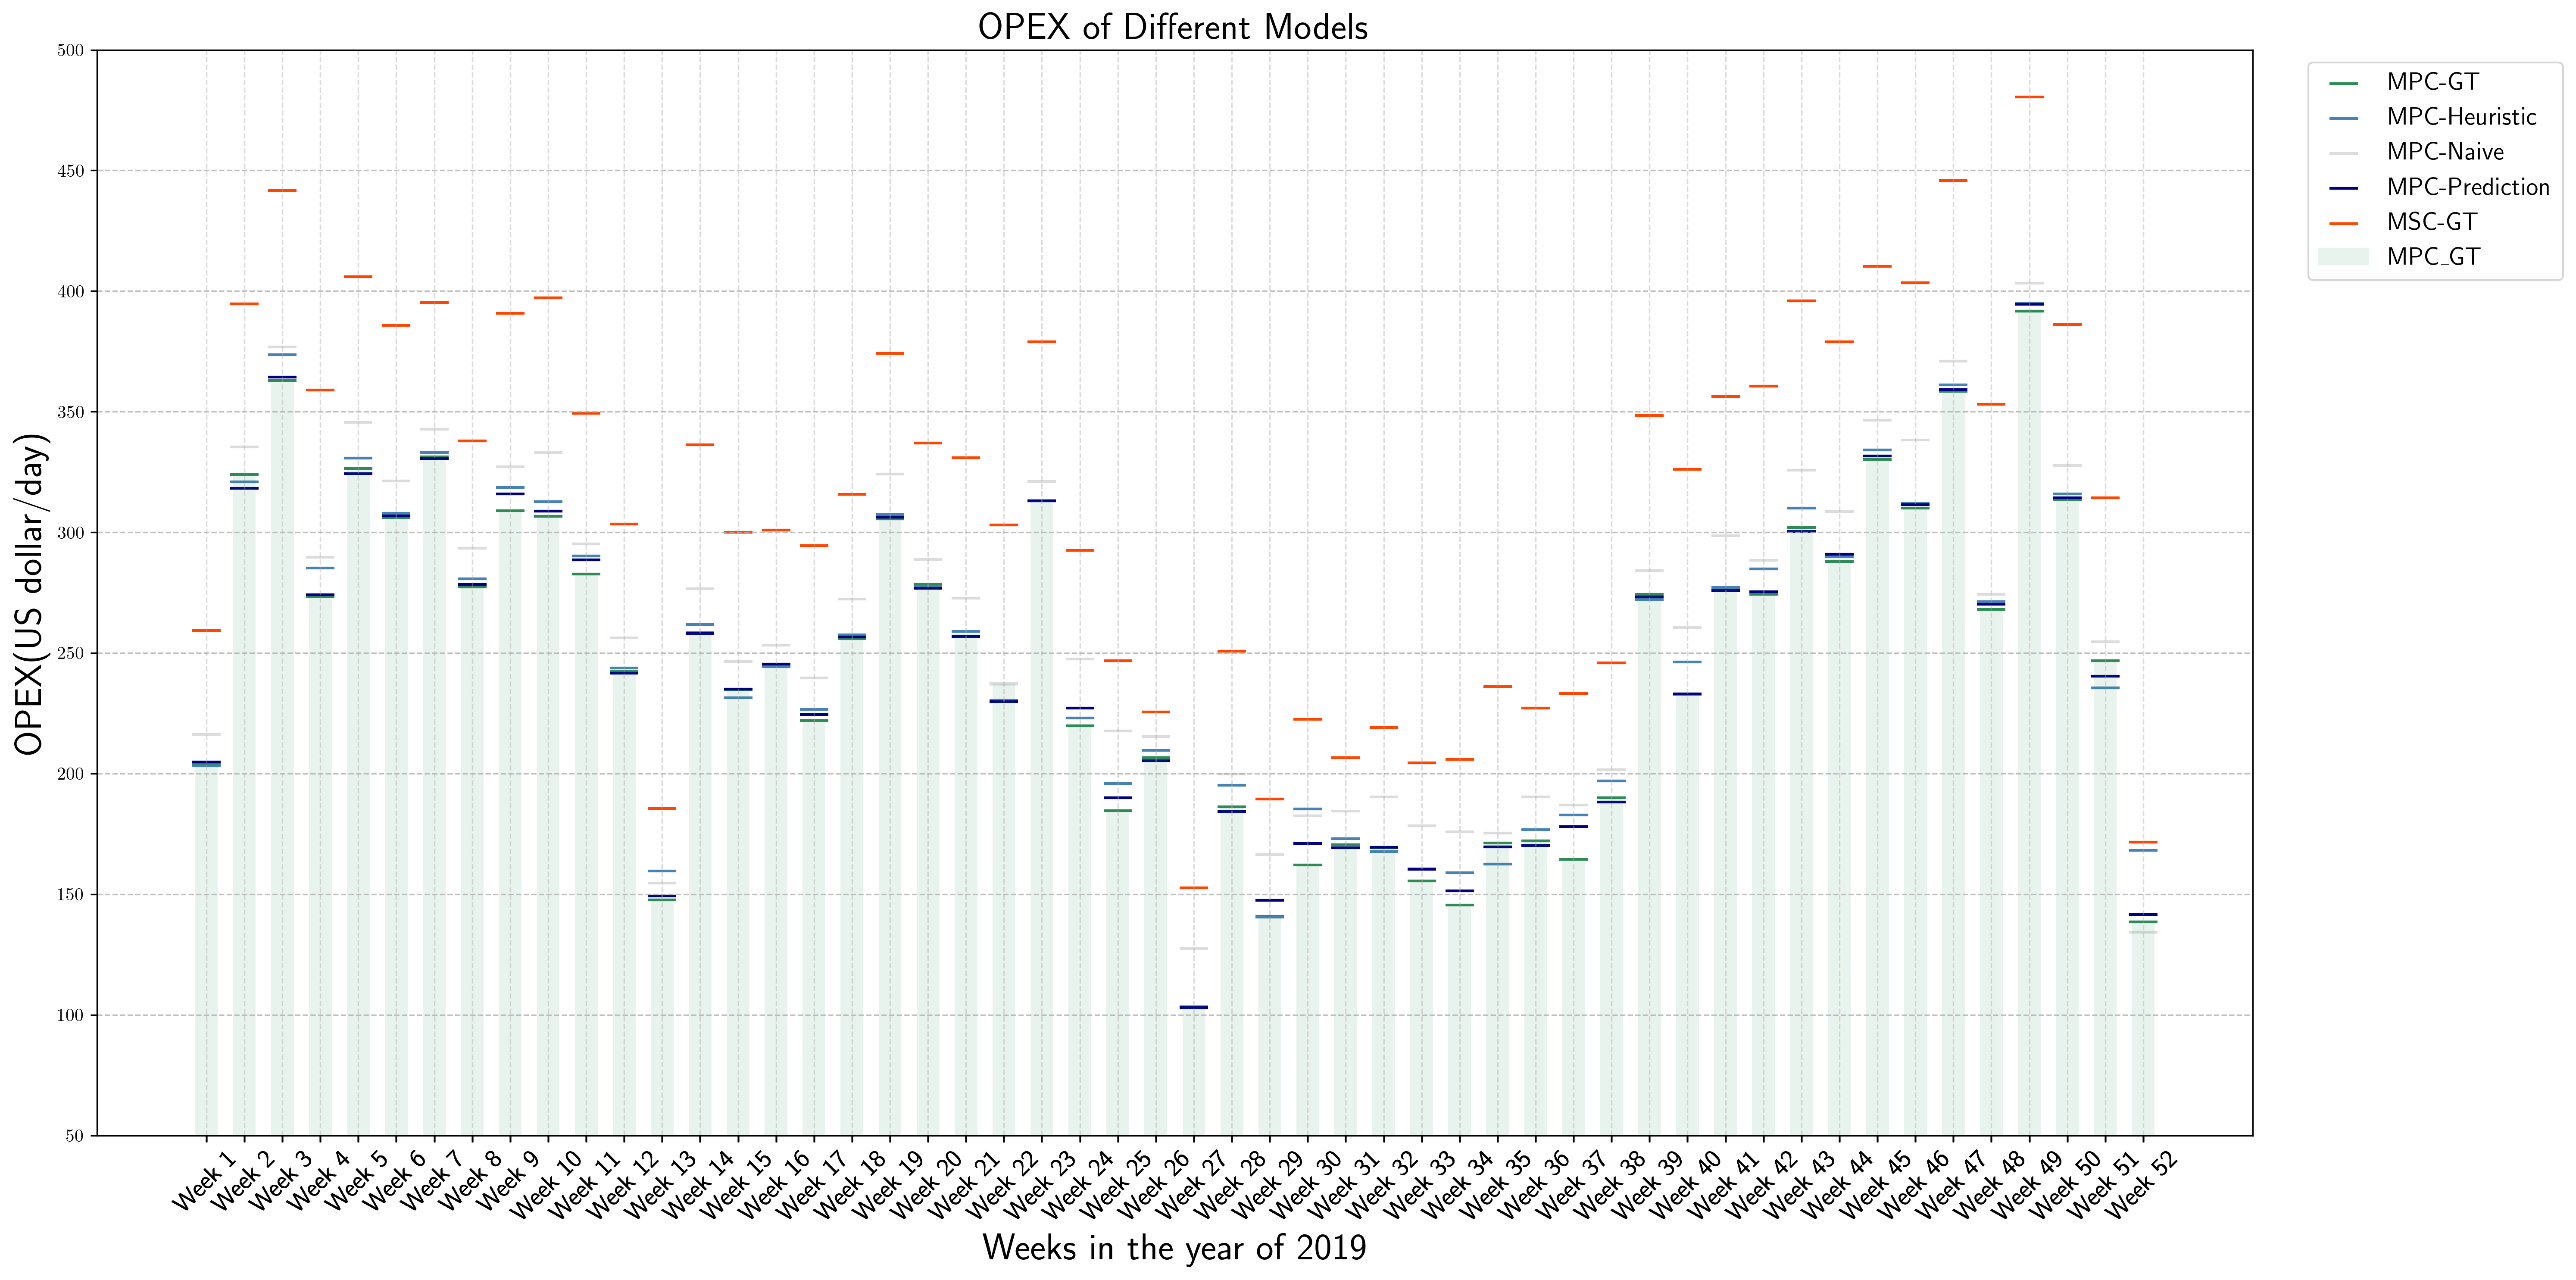

In [6]:
limit=[50,500]
figsize=(20,10)
plot_origin_valid_bar(df_opex,False,limit,figsize,'OPEX','0824_OPEX_byweek_bug_fixed.png',14)

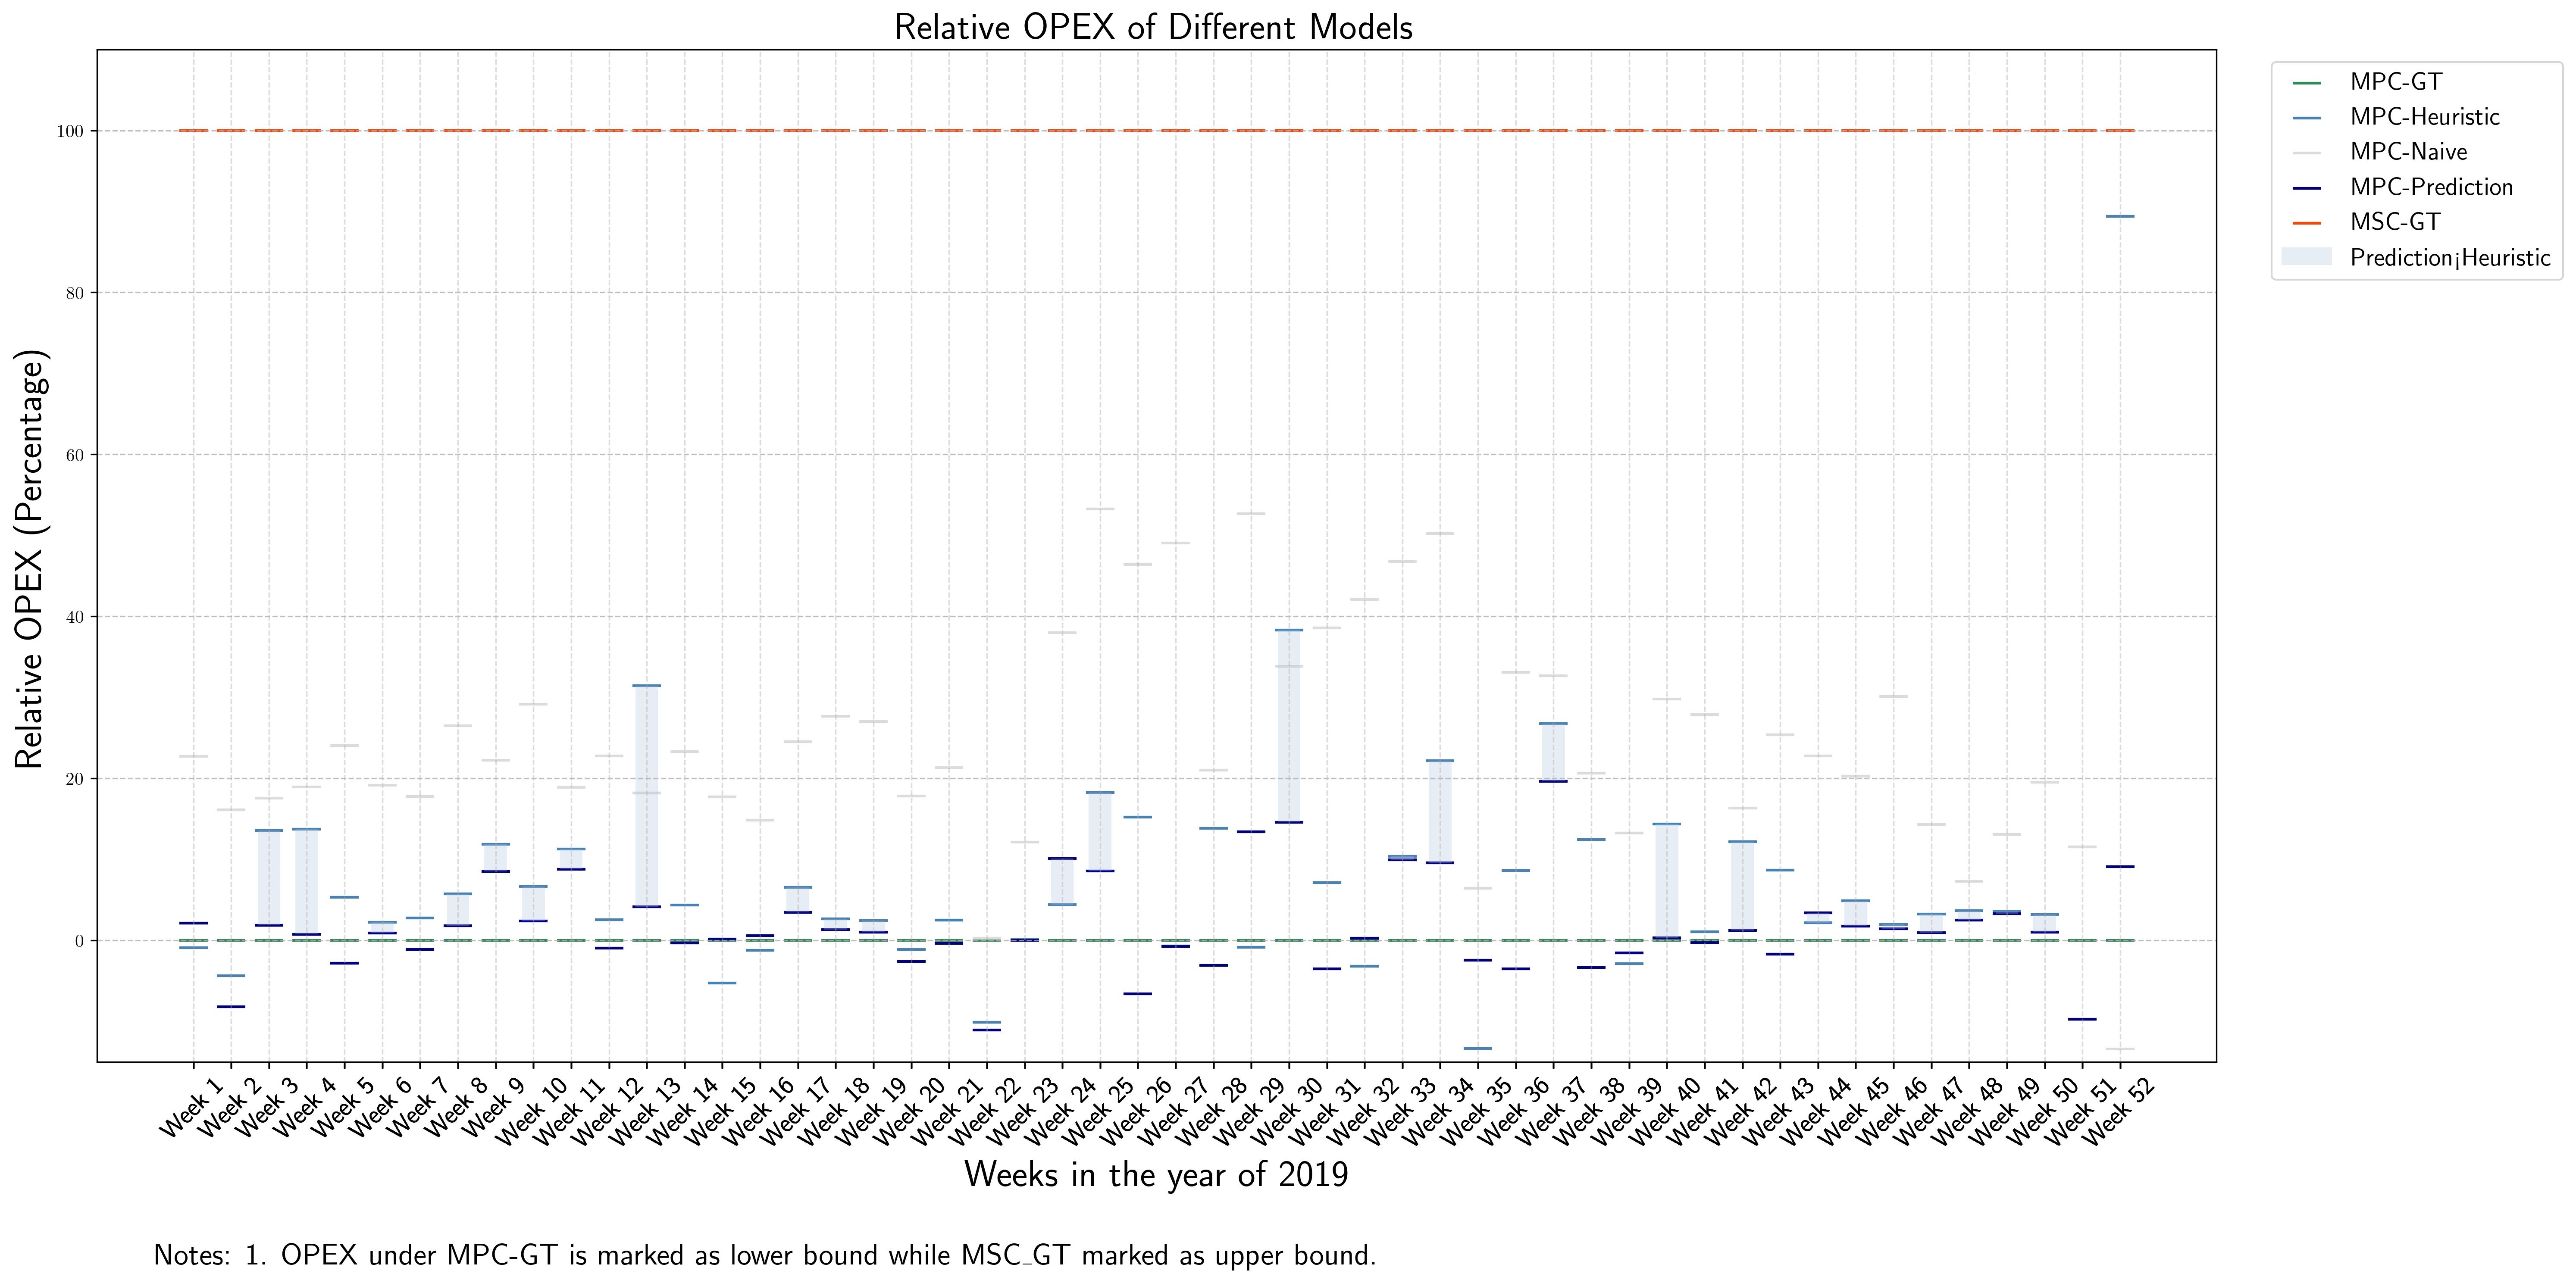

In [7]:
limit=[-15,110]
figsize=(20,10)
plot_origin_valid_bar(df_opex,True,limit,figsize,'OPEX','0824_relative_OPEX_byweek_bug_fixed.png',14)

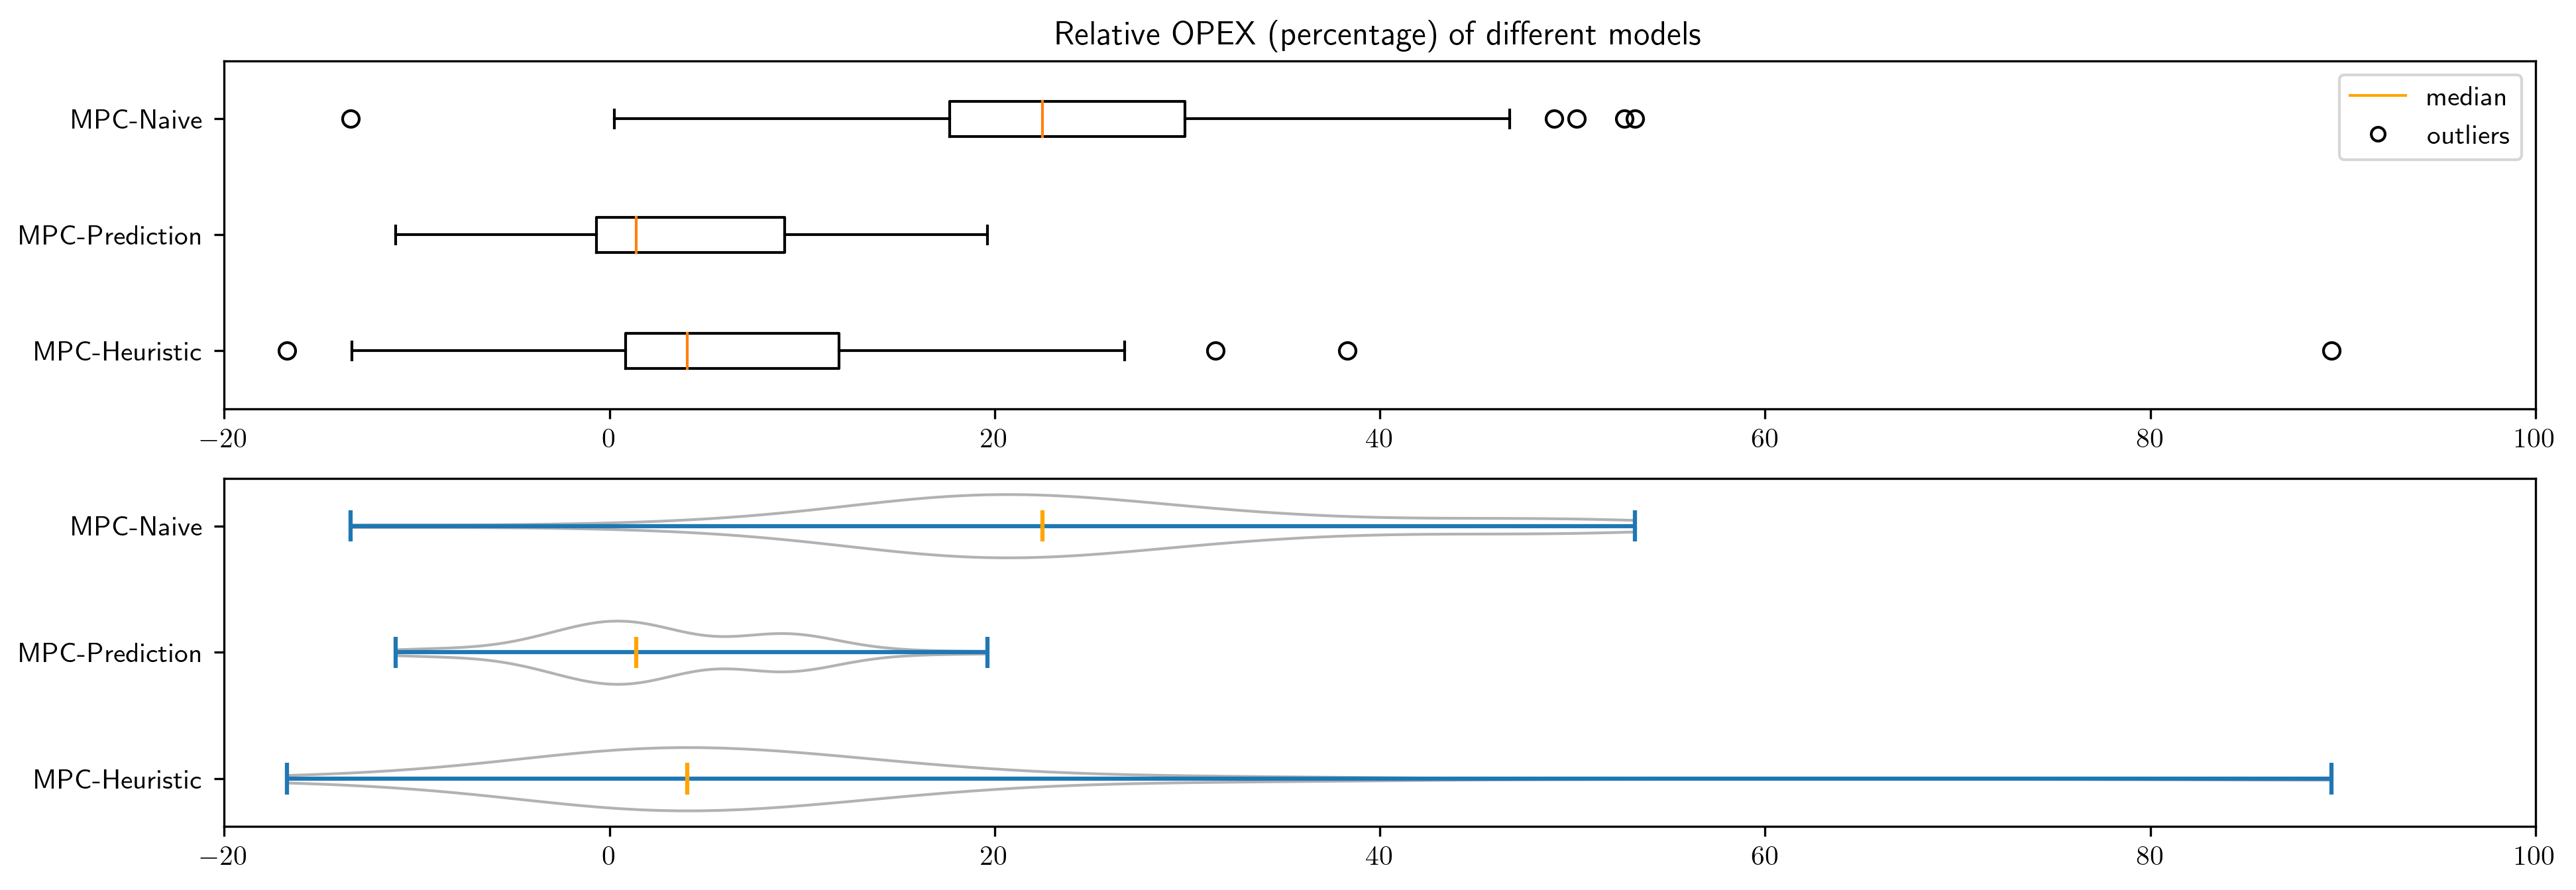

In [3]:
limit=[-20,100]
figsize=(15,5)
plot_box(df_opex,True,limit,figsize,'OPEX','0825_OPEX_byweek_bug_fixed_box.png',14)

In [ ]:
from matplotlib.lines import Line2D

def plot_box(df,relative,limit,figsize,key,save_fn,fontsize):
    
    labels=df['label'].unique()
    to_delete=np.array(['MPC-GT','MSC-GT'],dtype=object)
    labels_set=set(labels)
    to_delete_set=set(to_delete)
    labels=labels_set-to_delete_set
    
    if relative:
        key="relative_"+key

    boxes=[]
    fig,axs=plt.subplots(nrows=2,ncols=1,figsize=figsize)
    for i in labels:
        boxes.append(df[df.label==i][key])

    legend_elements = [Line2D([0], [0], color='orange', lw=1, label='median'),
                   Line2D([0], [0], marker='o', color='black', label='outliers',
                          markerfacecolor='w', markersize=5)]    
    
   
    #vert=False:水平箱线图；showmeans=True：显示均值
    axs[0].boxplot(boxes, labels = labels, vert=False,showmeans=False,
               meanline=True)
    axs[0].set_xlim(limit)
    axs[0].set_title("Relative OPEX (percentage) of different models")
    axs[0].legend(handles=legend_elements, loc='upper right')
    
    vp=axs[1].violinplot(boxes, vert=False,showmeans=False,
                      showmedians=True)
    vp['cmedians'].setcolor('orange')
    axs[1].set_yticks([y + 1 for y in range(len(boxes))],
                  labels=labels)
    axs[1].set_xlim(limit)
    #axs[1].set_title("Violin plot")
    
    #plt.title('Examples of boxplot',fontsize=fontsize)#标题，并设定字号大小
    if save_fn is not None:
        plt.savefig(save_fn)
    plt.show()
    axs[1].set_yticks([y + 1 for y in range(len(boxes))],
                  labels=labels)
    axs[1].set_xlim(limit)
    #axs[1].set_title("Violin plot")
    
    #plt.title('Examples of boxplot',fontsize=fontsize)#标题，并设定字号大小
    if save_fn is not None:
        plt.savefig(save_fn)
    plt.show()

In [ ]:
from matplotlib.lines import Line2D

def plot_box(df,relative,limit,figsize,key,save_fn,fontsize):
    
    labels=df['label'].unique()
    to_delete=np.array(['MPC-GT','MSC-GT'],dtype=object)
    labels_set=set(labels)
    to_delete_set=set(to_delete)
    labels=labels_set-to_delete_set
    
    if relative:
        key="relative_"+key

    boxes=[]
    fig,axs=plt.subplots(nrows=2,ncols=1,figsize=figsize)
    for i in labels:
        boxes.append(df[df.label==i][key])

    legend_elements = [Line2D([0], [0], color='orange', lw=1, label='median'),
                   Line2D([0], [0], marker='o', color='black', label='outliers',
                          markerfacecolor='w', markersize=5)]    
    
   
    #vert=False:水平箱线图；showmeans=True：显示均值
    axs[0].boxplot(boxes, labels = labels, vert=False,showmeans=False,
               meanline=True)
    axs[0].set_xlim(limit)
    axs[0].set_title("Relative OPEX (percentage) of different models")
    axs[0].legend(handles=legend_elements, loc='upper right')
    
    vp=axs[1].violinplot(boxes, vert=False,showmeans=False,
                      showmedians=True)
    vp['cmedians'].setcolor('orange')
    axs[1].set_yticks([y + 1 for y in range(len(boxes))],
                  labels=labels)
    axs[1].set_xlim(limit)
    #axs[1].set_title("Violin plot")
    
    #plt.title('Examples of boxplot',fontsize=fontsize)#标题，并设定字号大小
    if save_fn is not None:
        plt.savefig(save_fn)
    plt.show()
    axs[1].set_yticks([y + 1 for y in range(len(boxes))],
                  labels=labels)
    axs[1].set_xlim(limit)
    #axs[1].set_title("Violin plot")
    
    #plt.title('Examples of boxplot',fontsize=fontsize)#标题，并设定字号大小
    if save_fn is not None:
        plt.savefig(save_fn)
    plt.show()

# plot of exp: 0824 bug fixed (rewrite the executing process)
# dc_price=0

In [2]:
# load data

path='D:\Codes\Energy_grid_new\output\experiments\Aug2023_3\LOG-MPC-MSC-6h-bat-52weeks-0dc.xlsx'
df_0dc=pd.read_excel(path)
df_opex_0dc=pre_process(df_0dc,'OPEX')
df_tou_0dc=pre_process(df_0dc,"tou_cost")

    strategy  pred_model  week_of_year        OPEX           label  \
0        MPC          GT             1  146.378552          MPC-GT   
1        MPC  Prediction             1  146.385230  MPC-Prediction   
2        MPC   Heuristic             1  147.086818   MPC-Heuristic   
3        MPC       Naive             1  146.886707       MPC-Naive   
4        MSC          GT             1  201.964274          MSC-GT   
..       ...         ...           ...         ...             ...   
255      MPC          GT            52   93.109948          MPC-GT   
256      MPC  Prediction            52   93.423026  MPC-Prediction   
257      MPC   Heuristic            52   95.382076   MPC-Heuristic   
258      MPC       Naive            52   93.240709       MPC-Naive   
259      MSC          GT            52  128.107053          MSC-GT   

     relative_OPEX  
0         0.000000  
1         0.012013  
2         1.274187  
3         0.914182  
4       100.000000  
..             ...  
255       0.

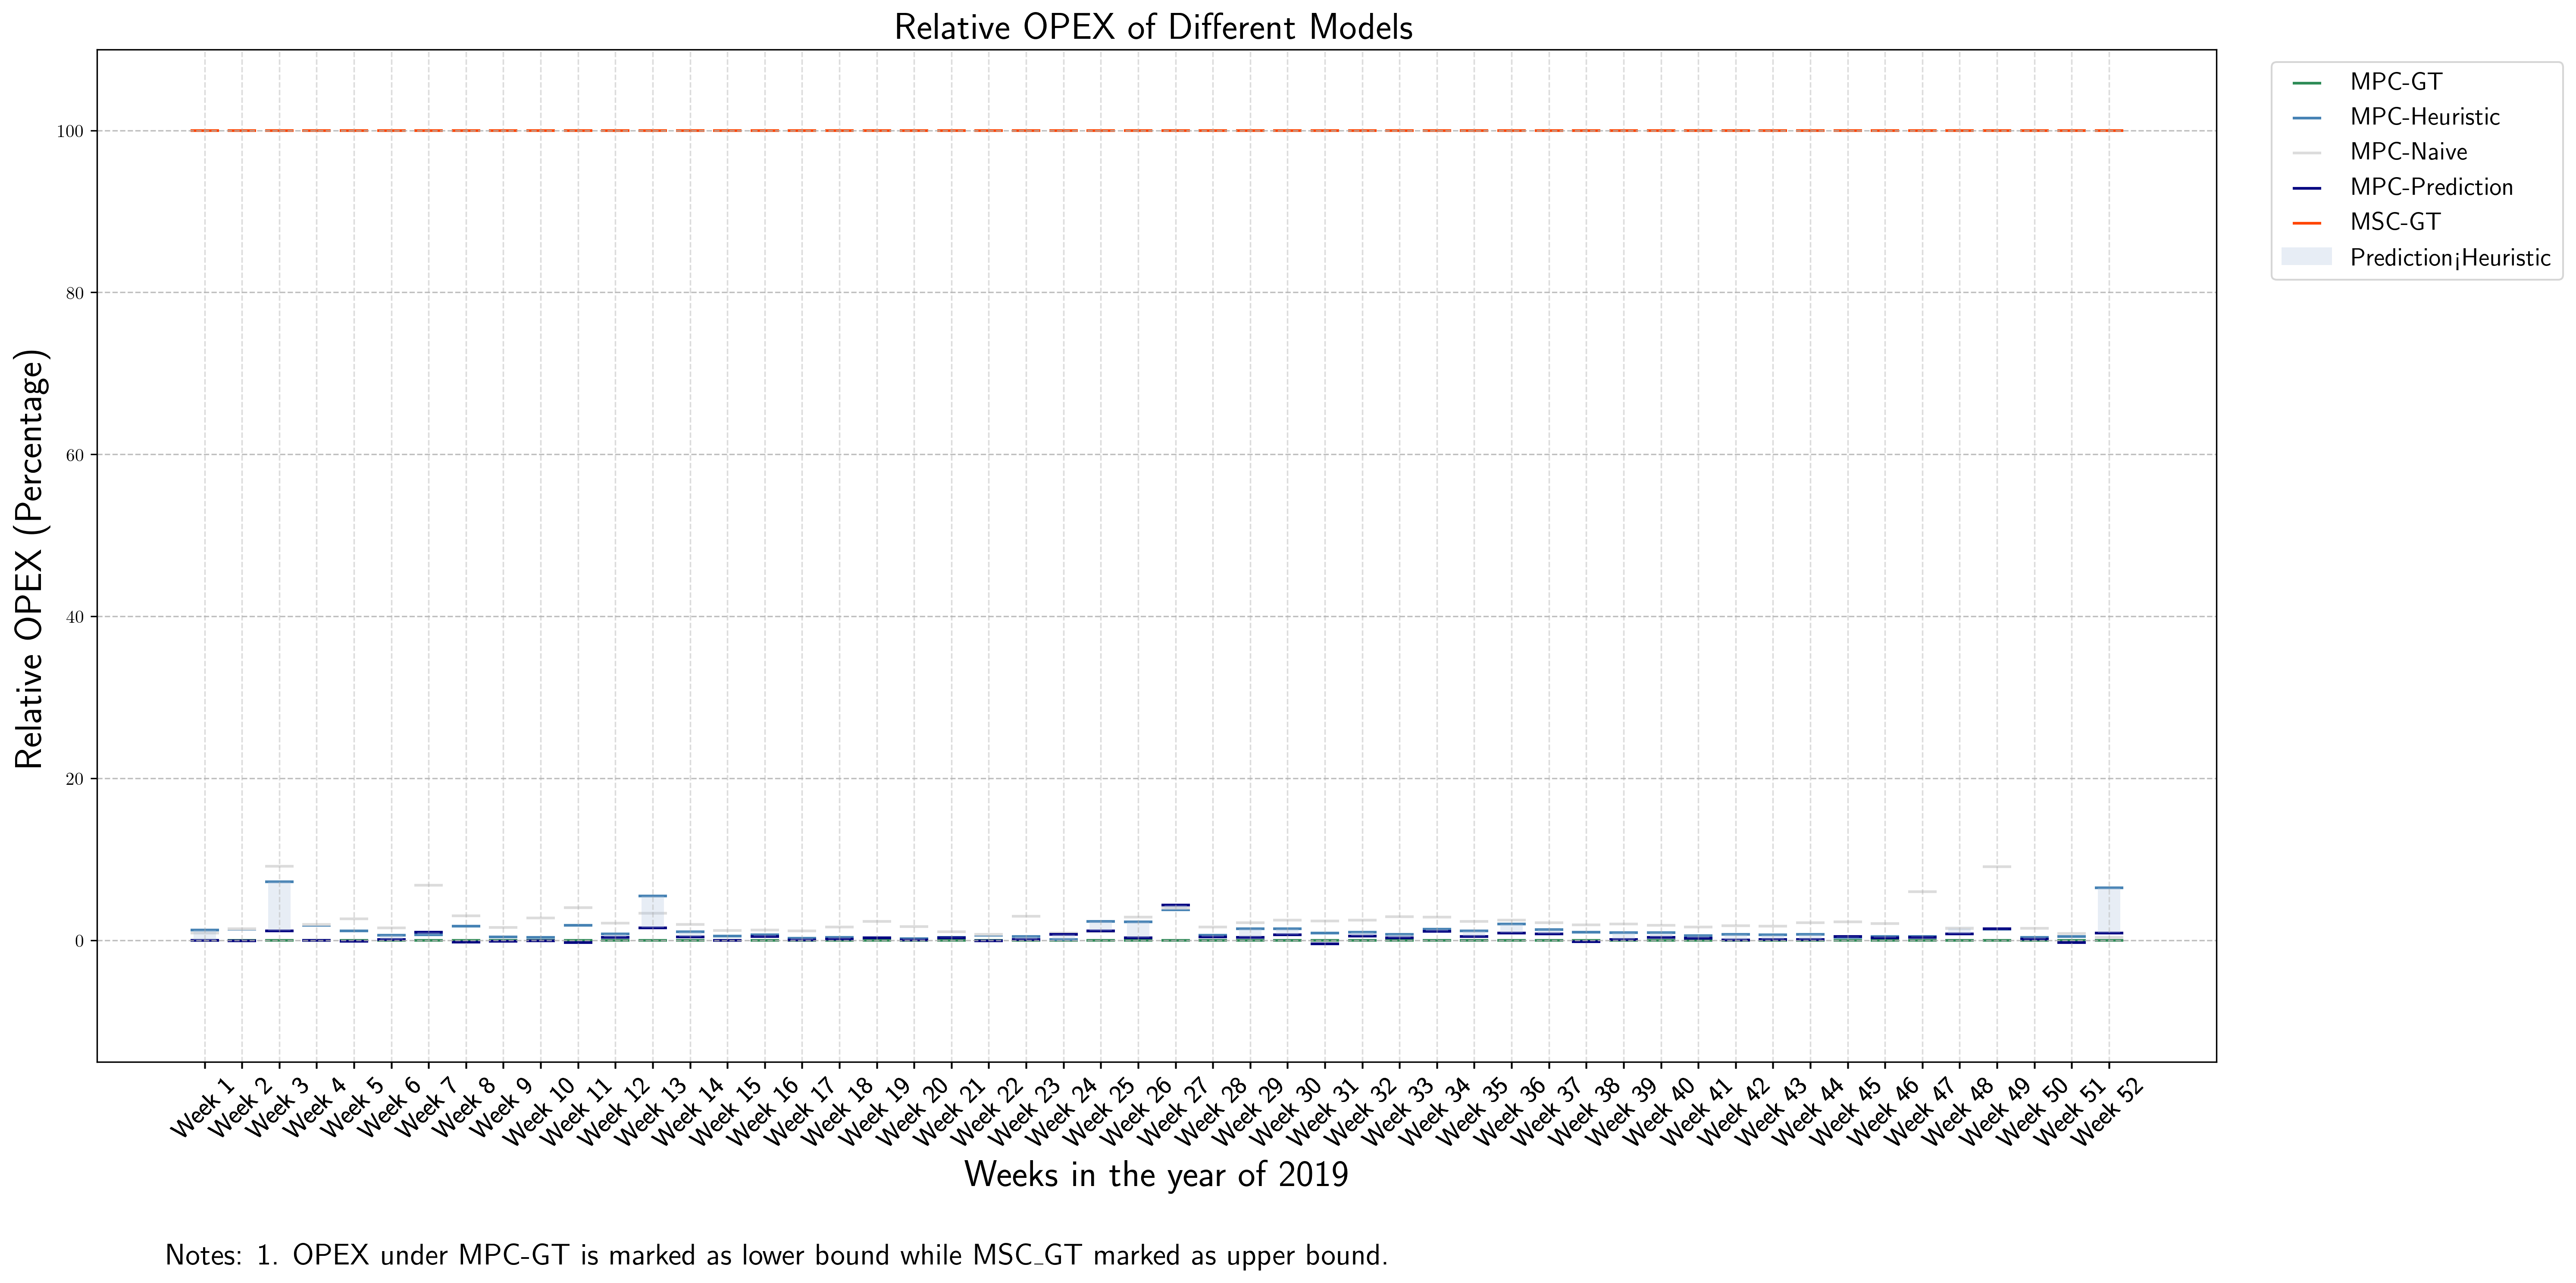

In [4]:
limit=[-15,110]
figsize=(20,10)
plot_origin_valid_bar(df_opex_0dc,True,limit,figsize,'OPEX','0825_relative_OPEX_0dc_byweek_bug_fixed.png',14,-40)

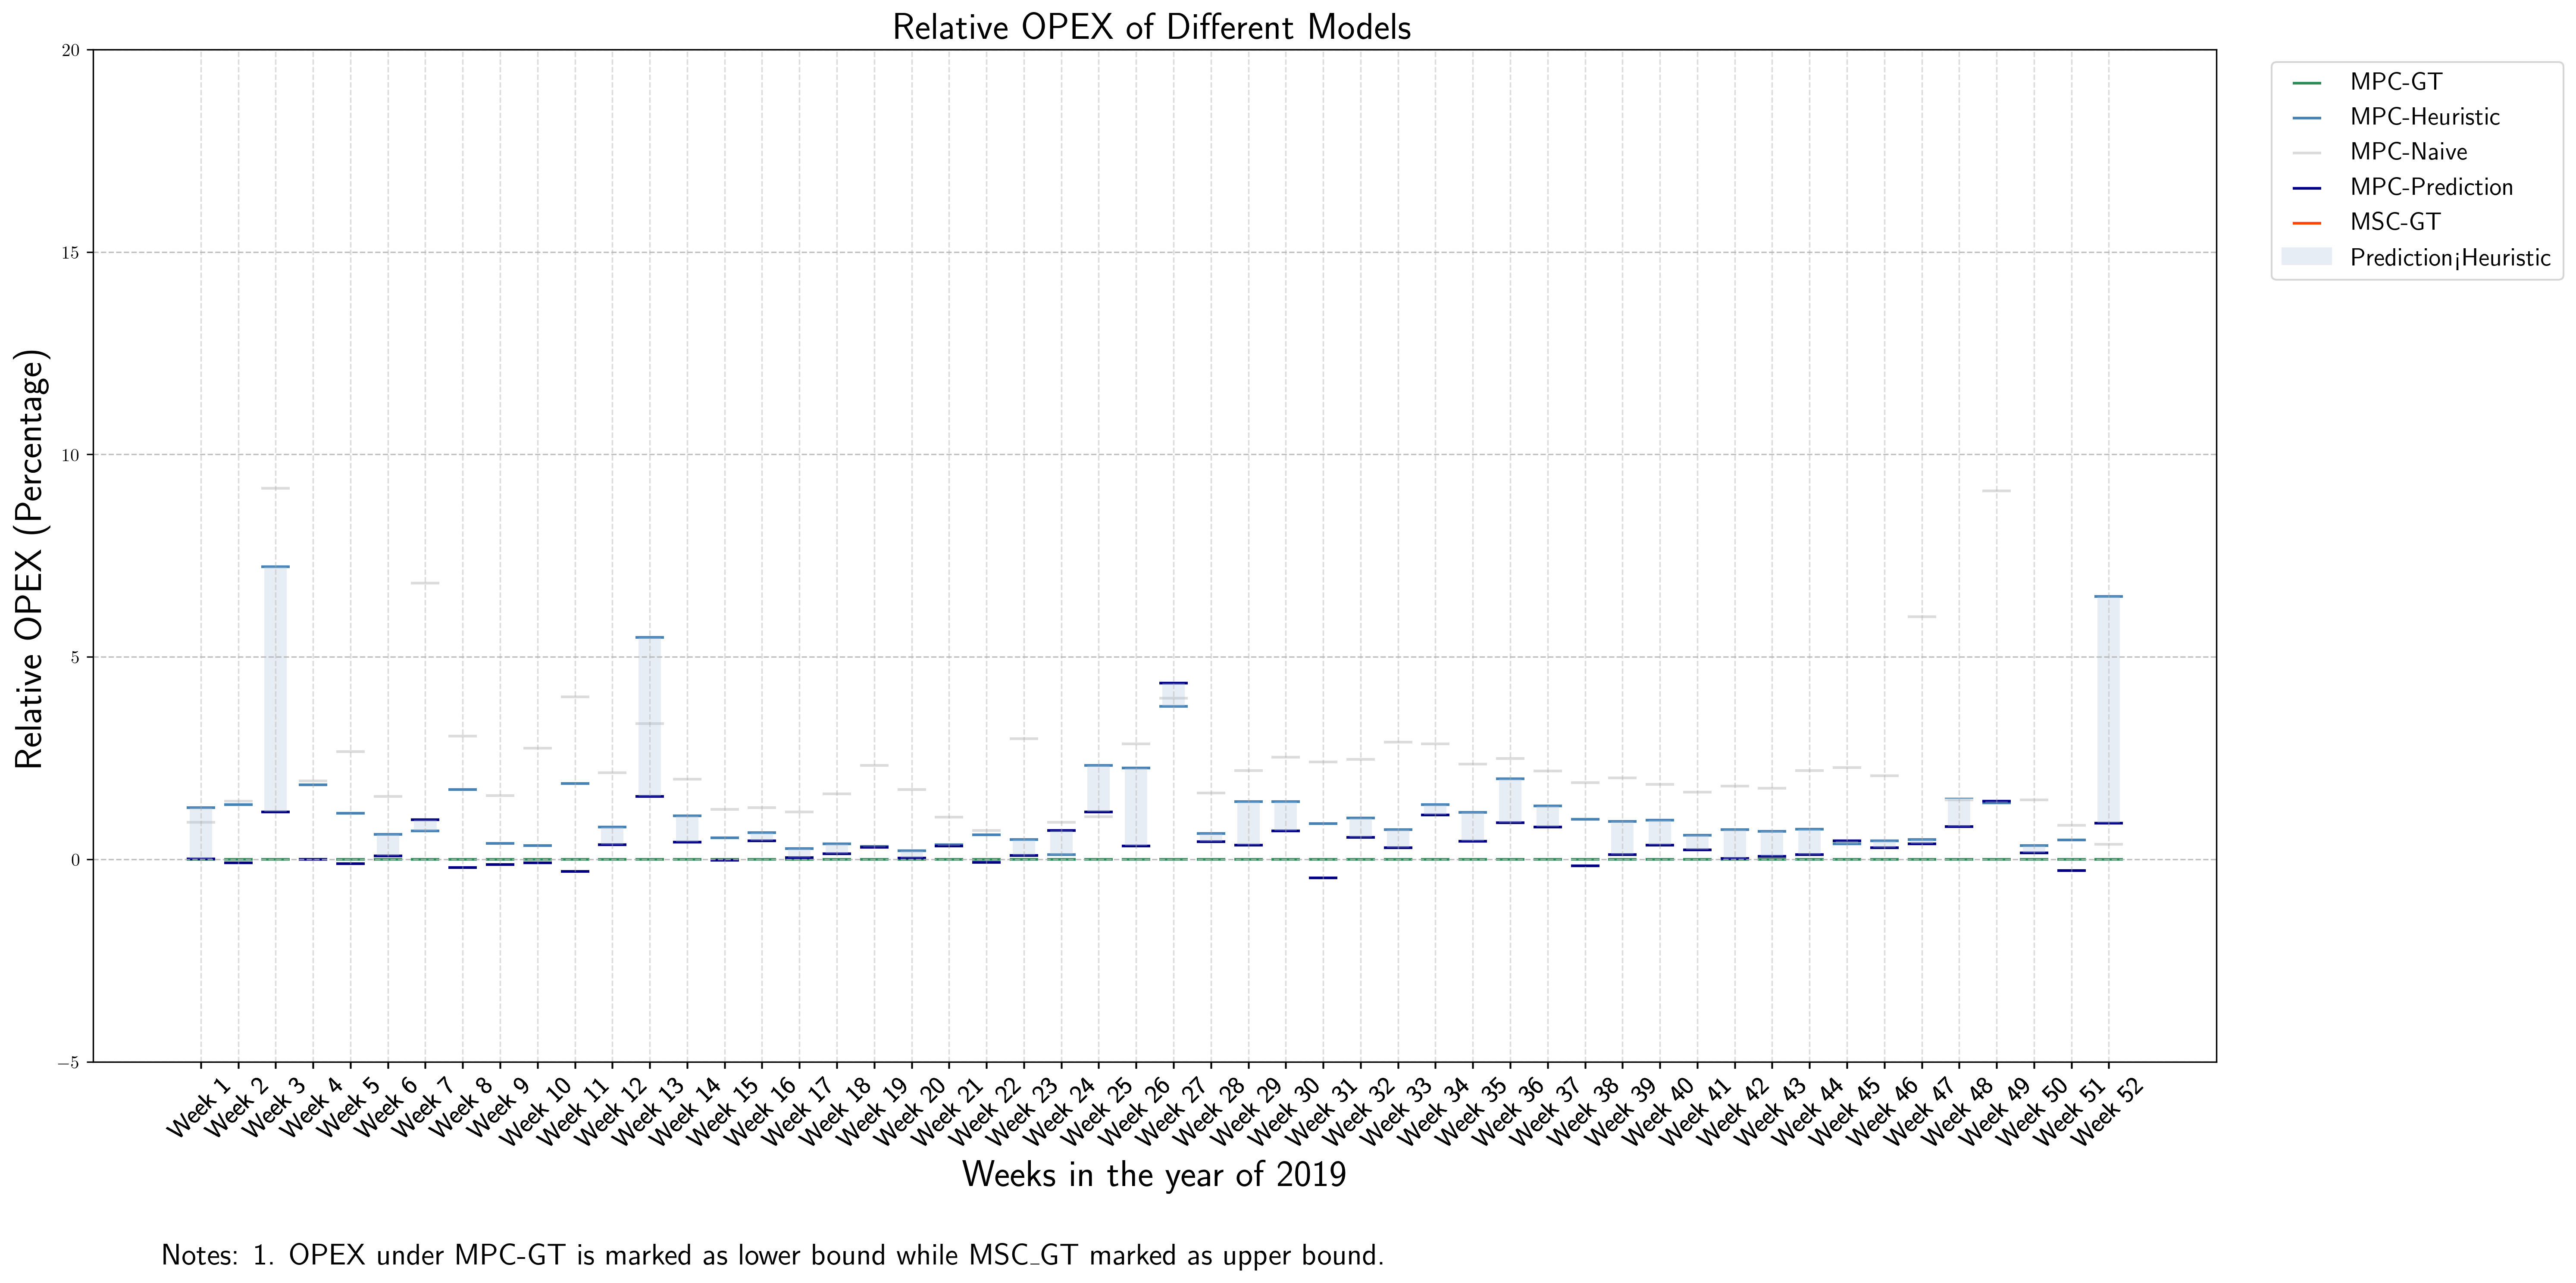

In [6]:
limit=[-5,20]
figsize=(20,10)
plot_origin_valid_bar(df_opex_0dc,True,limit,figsize,'OPEX','0825_relative_OPEX_0dc_byweek_bug_fixed_scaled.png',14,-10)

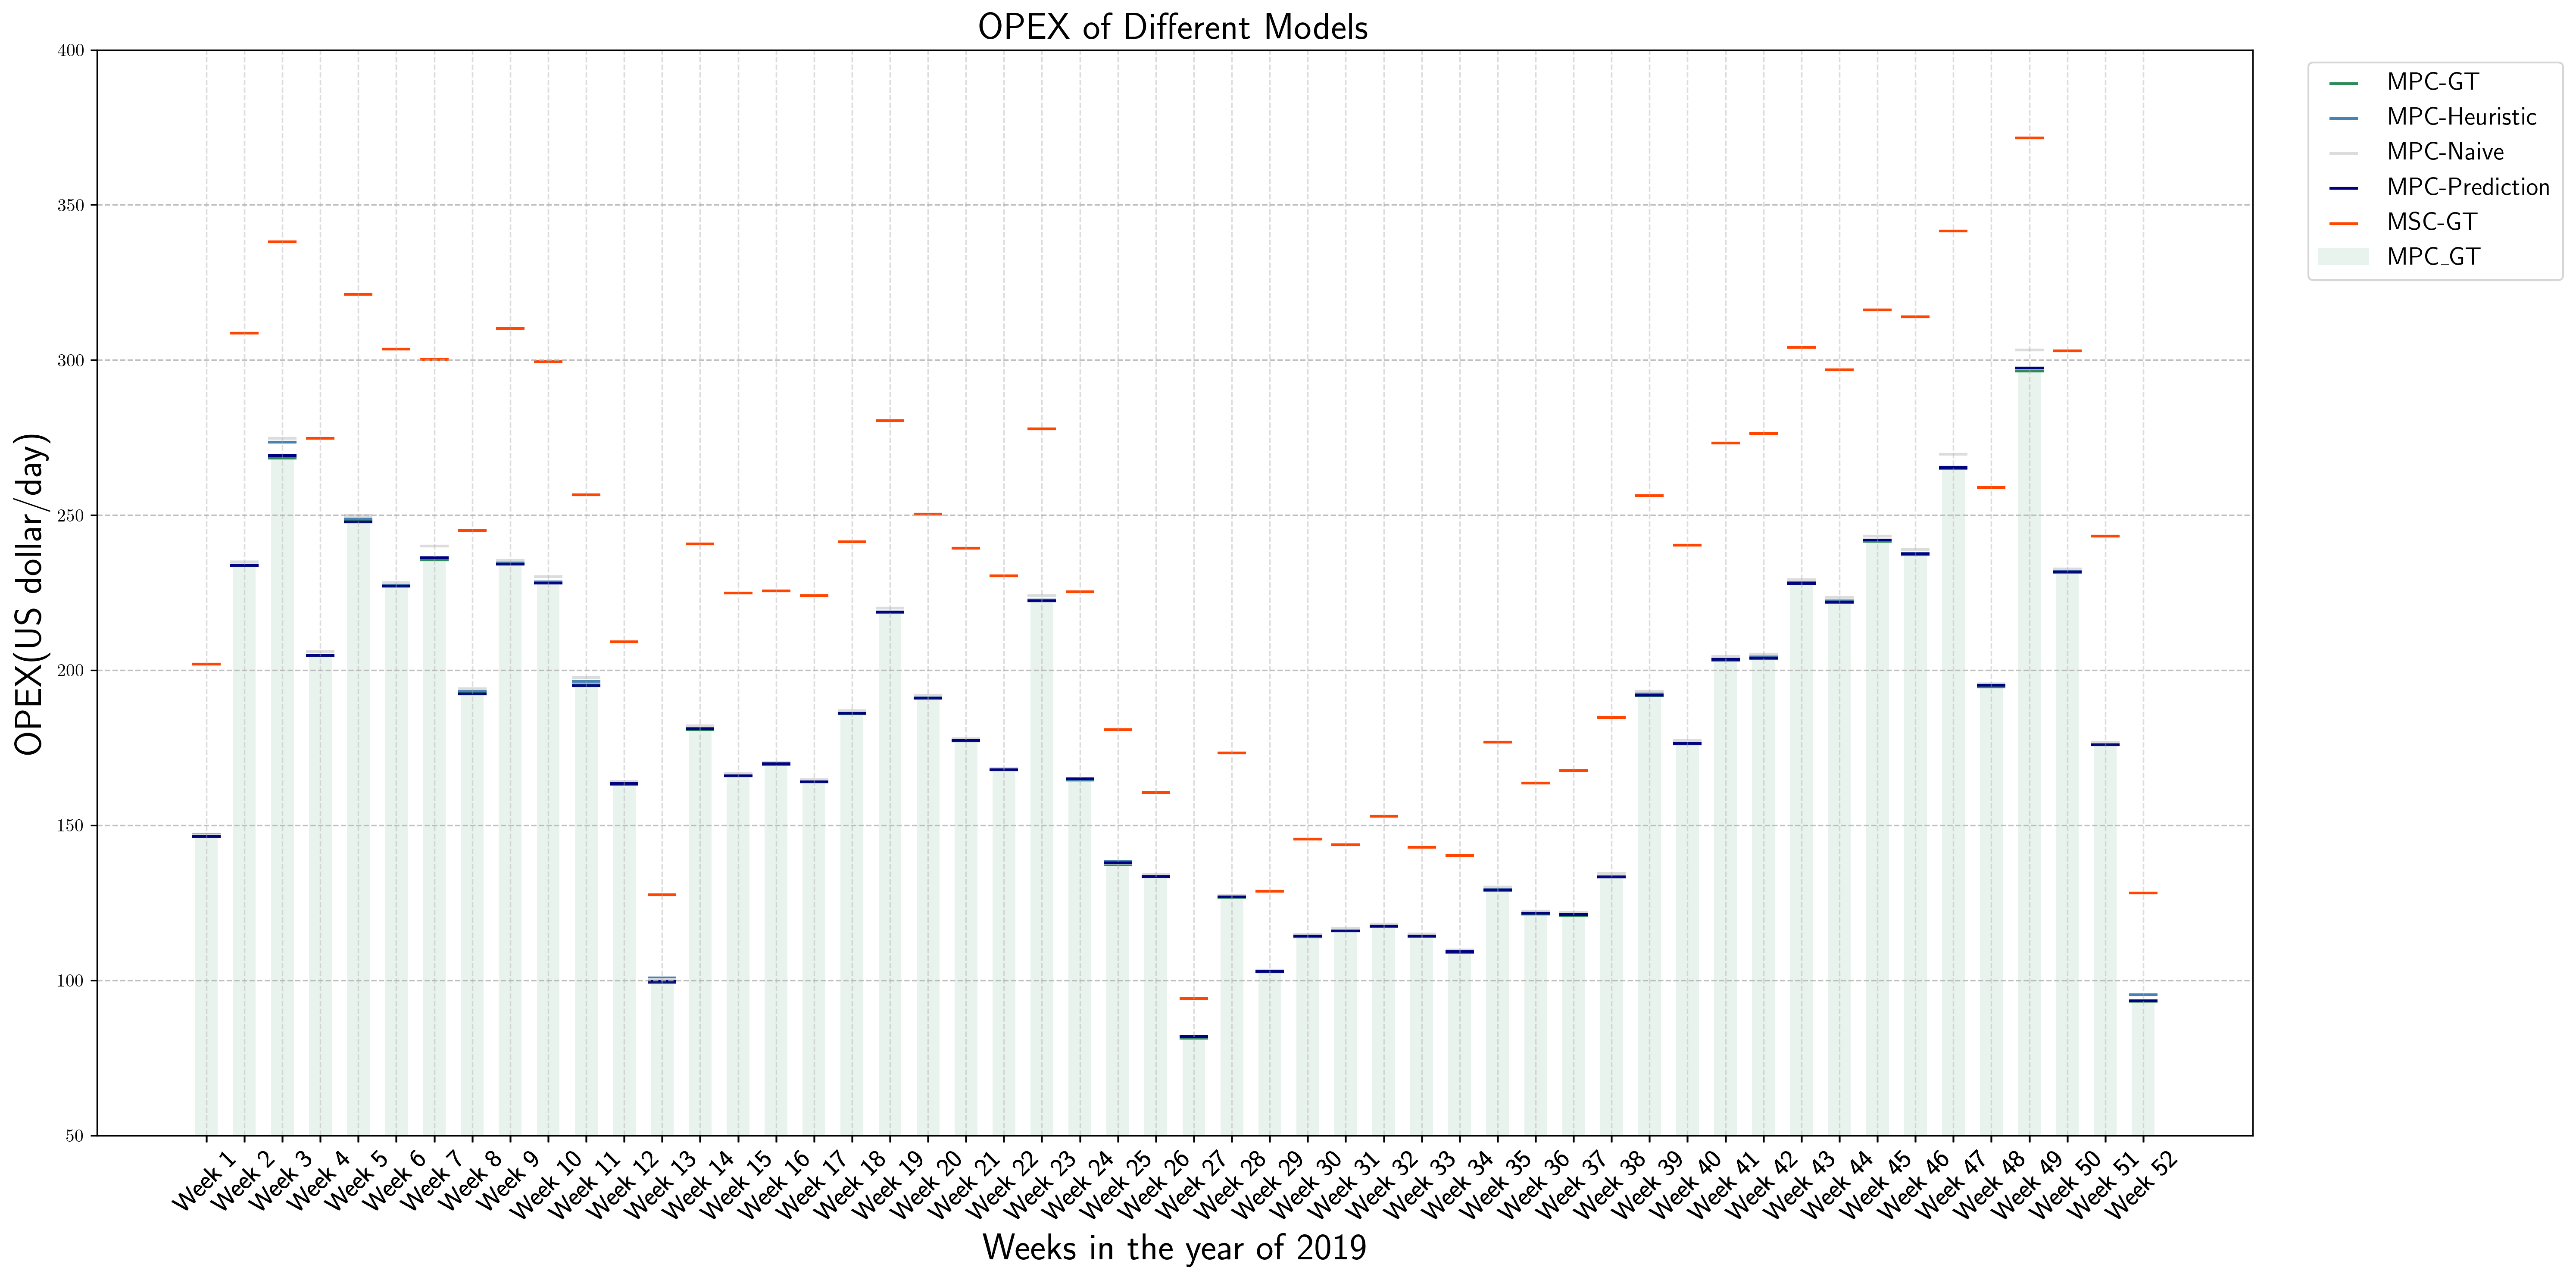

In [7]:
limit=[50,400]
figsize=(20,10)
plot_origin_valid_bar(df_opex_0dc,False,limit,figsize,'OPEX','0825_OPEX_0dc_byweek_bug_fixed.png',14,-40)

{'bodies': [<matplotlib.collections.PolyCollection object at 0x000001A70D8B1970>, <matplotlib.collections.PolyCollection object at 0x000001A70D8CB250>, <matplotlib.collections.PolyCollection object at 0x000001A70D8CB6D0>], 'cmaxes': <matplotlib.collections.LineCollection object at 0x000001A70D8B1A00>, 'cmins': <matplotlib.collections.LineCollection object at 0x000001A70D8C4310>, 'cbars': <matplotlib.collections.LineCollection object at 0x000001A70D8C4C40>, 'cmedians': <matplotlib.collections.LineCollection object at 0x000001A70D8C4280>}


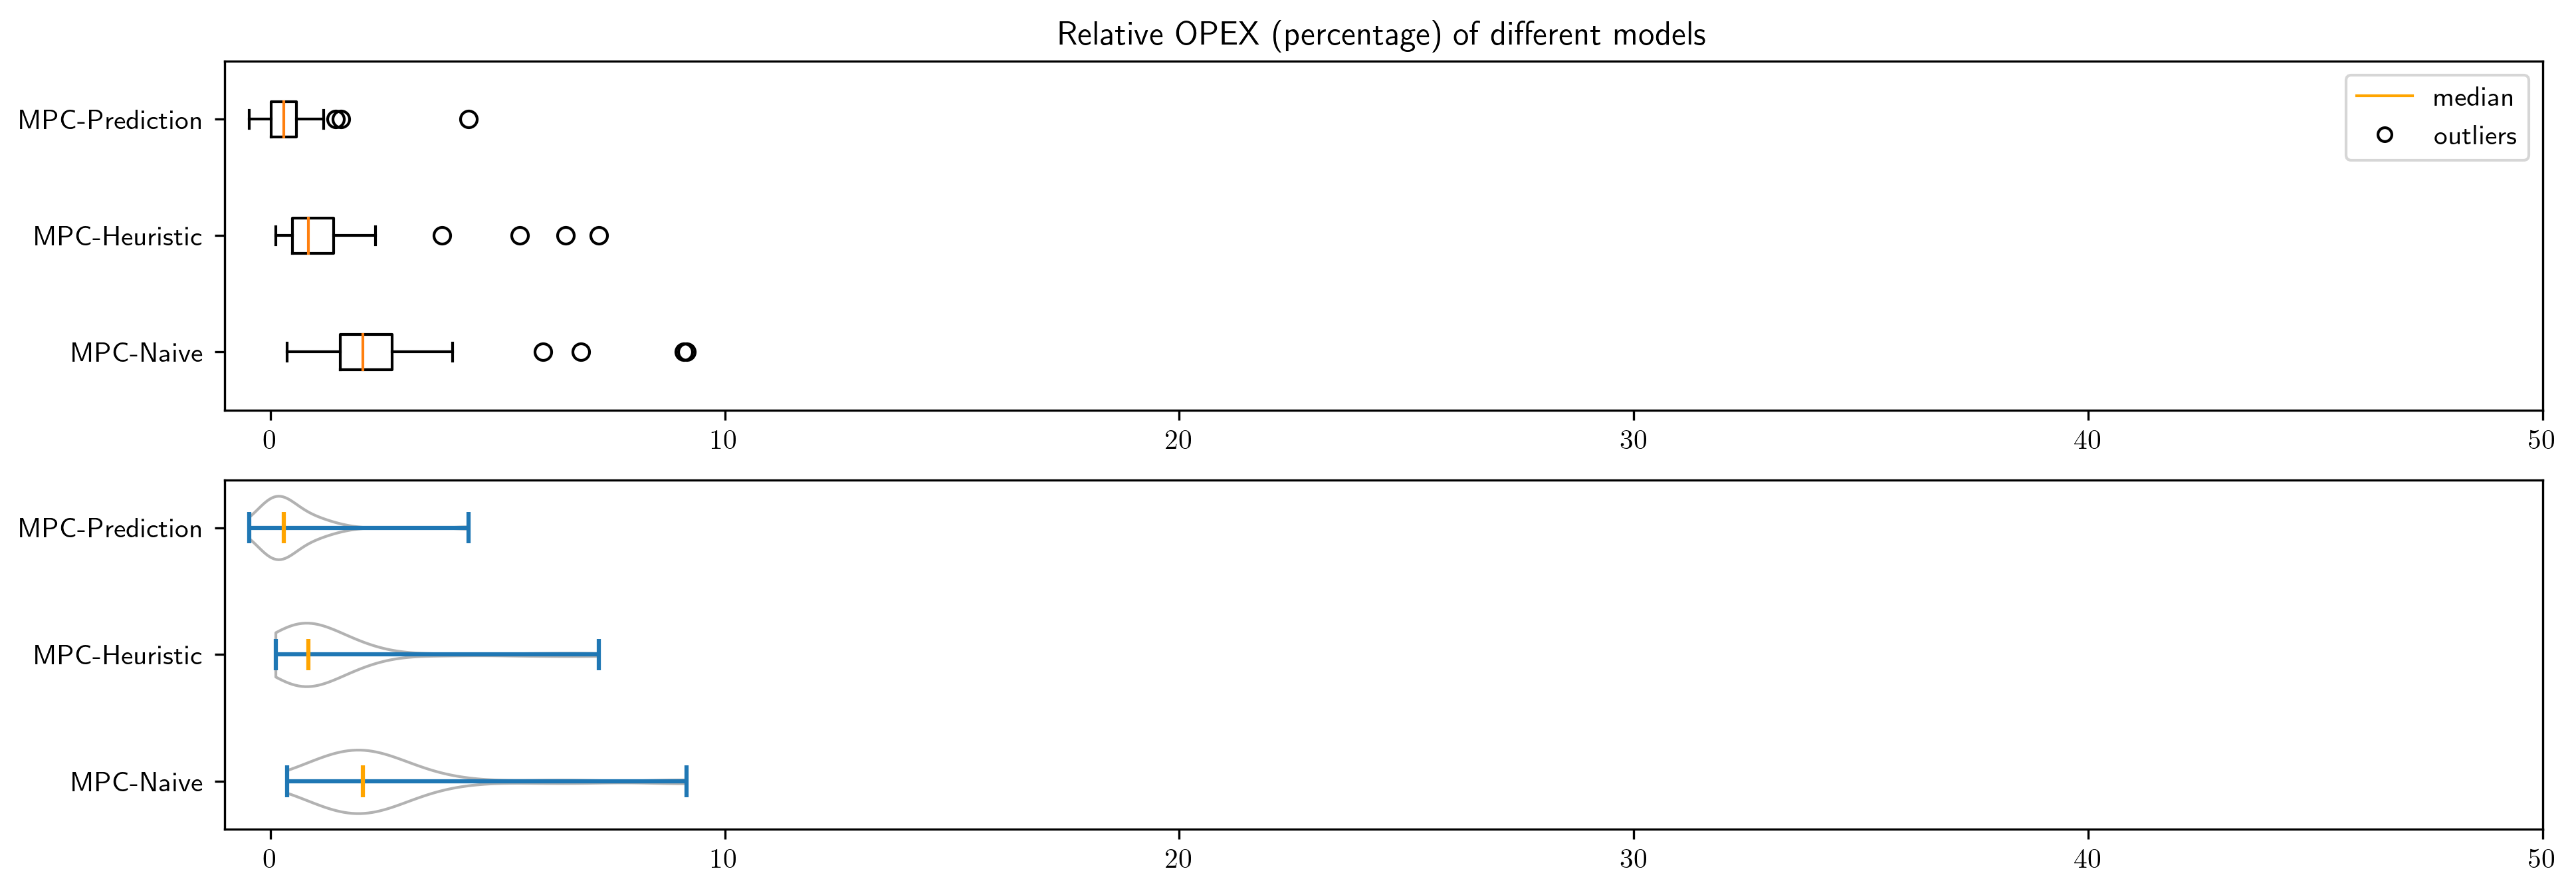

<Figure size 1920x1440 with 0 Axes>

In [95]:
limit=[-1,50]
figsize=(15,5)
plot_box(df_opex_0dc,True,limit,figsize,'OPEX','0825_OPEX_0dc_byweek_bug_fixed_box.png',14)

In [5]:
df_opex_0dc

strategy  pred_model  week_of_year        OPEX           label  \
0        MPC          GT             1  146.378552          MPC-GT   
1        MPC  Prediction             1  146.385230  MPC-Prediction   
2        MPC   Heuristic             1  147.086818   MPC-Heuristic   
3        MPC       Naive             1  146.886707       MPC-Naive   
4        MSC          GT             1  201.964274          MSC-GT   
..       ...         ...           ...         ...             ...   
255      MPC          GT            52   93.109948          MPC-GT   
256      MPC  Prediction            52   93.423026  MPC-Prediction   
257      MPC   Heuristic            52   95.382076   MPC-Heuristic   
258      MPC       Naive            52   93.240709       MPC-Naive   
259      MSC          GT            52  128.107053          MSC-GT   

     relative_OPEX  is_valid  
0         0.000000      True  
1         0.012013      True  
2         1.274187      True  
3         0.914182      True  
4       100.000000      True  
..             ...       ...  
255       0.000000      True  
256       0.894582      True  
257       6.492333      True  
258       0.373634      True  
259     100.000000      True  

[260 rows x 7 columns]

# plot the eva of heuristic prediction

In [2]:
'''metrics_steps=[1,2,3,4,5,6,7,8,9,10,11,12,24,36,48,60,72,84,96]
simple_metrics=[]
metric_keys={"MAE":[1,2,3,4,5,6,7,8,9,10,11,12,24,36,48,60,72,84,96],
             "MAPE":[1,2,3,4,5,6,7,8,9,10,11,12,24,36,48,60,72,84,96],
             #"RMSE":[1,2,3,4,5,6,7,8,9,10,11,12,24,36,48,60,72,84,96],
             }
for i in metric_keys.keys():
    for n in metric_keys[i]:
        simple_metrics.append(i+'_'+str(n))
    

prediction_bld=Prediction_evaluation(
    abs_path=True,
    simple_path='L:\Coding_project\Energy_grid_new_exp_local/bld_heuristic_pred_eva.csv',
    xgb_path='L:\Coding_project\Energy_grid_new\data\load_forecast\XGB\BLD_Sum.csv',
    type='BLD',
    name=None,
    simple_metrics=simple_metrics,
    scale_coef=1,
    group_method='week'
)'''

simple_metrics=[]
metric_keys={"MAE":[1,2,3,6,7,8,9,10,11,12,24,36,48,60,72,84,96],
             "MAPE":[1,2,3,4,5,6,7,8,9,10,11,12,24,36,48,60,72,84,96],
             #"RMSE":[1,2,3,4,5,6,7,8,9,10,11,12,24,36,48,60,72,84,96],
             }
for i in metric_keys.keys():
    for n in metric_keys[i]:
        simple_metrics.append(i+'_'+str(n))
prediction_pv=Prediction_evaluation(
    abs_path=True,
    simple_path='L:\Coding_project\Energy_grid_new_exp_local/pv_heuristic_pred_eva.csv',
    xgb_path='L:\Coding_project\Energy_grid_new\data\load_forecast\XGB\PV_Sum.csv',
    type='BLD',
    name=None,
    simple_metrics=simple_metrics,
    scale_coef=1,
    group_method='week'
)

Notification: data type of simple predeiction:
object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35142 entries, 0 to 35141
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        35142 non-null  datetime64[ns]
 1   RealPower       35041 non-null  float64       
 2   Pred_Simple     35142 non-null  object        
 3   historical_ave  35041 non-null  float64       
 4   future_real     35142 non-null  object        
 5   MAE_1           35041 non-null  float64       
 6   RMSE_1          35041 non-null  float64       
 7   MAPE_1          35041 non-null  float64       
 8   MAE_2           35041 non-null  float64       
 9   RMSE_2          35041 non-null  float64       
 10  MAPE_2          35041 non-null  float64       
 11  MAE_3           35041 non-null  float64       
 12  RMSE_3          35041 non-null  float64       
 13  MAPE_3          35041 non-null  float64       
 14  

In [27]:
eva=prediction_pv.metrics_by_duration()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35142 entries, 0 to 35141
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        35142 non-null  datetime64[ns]
 1   RealPower       35041 non-null  float64       
 2   historical_ave  35041 non-null  float64       
 3   MAE_1           35041 non-null  float64       
 4   RMSE_1          35041 non-null  float64       
 5   MAPE_1          35041 non-null  float64       
 6   MAE_2           35041 non-null  float64       
 7   RMSE_2          35041 non-null  float64       
 8   MAPE_2          35041 non-null  float64       
 9   MAE_3           35041 non-null  float64       
 10  RMSE_3          35041 non-null  float64       
 11  MAPE_3          35041 non-null  float64       
 12  MAE_4           35041 non-null  float64       
 13  RMSE_4          35041 non-null  float64       
 14  MAPE_4          35041 non-null  float64       
 15  MA

In [28]:
eva=eva.drop(columns=['DateTime','RealPower'])

In [48]:
evanew=pd.DataFrame(eva, columns=['MAE_1', 'MAE_2', 'MAE_XGB'])

In [56]:
def plot_eva_scatter(df,metric,steps,limit):
    
    plt.style.use("_mpl-gallery-nogrid")

    key_list=[]
    for i in steps:
        key_list.append(metric+'_'+str(i))
    
    color_dict={
        'MPC-GT':'seagreen',
        'MPC-Prediction':'navy',
        'MPC-Heuristic':'steelblue',
        'MPC-Naive':'gainsboro',
        'MSC-GT':'orangered',
        'MSC-Naive':'grey'
    }
    maker_dict={
        'MPC-GT':'_',
        'MPC-Prediction':'_',
        'MPC-Heuristic':'_',
        'MPC-Naive':'_',
        'MSC-GT':'_',
        'MSC-Naive':'_'
    }
    if metric=='MAPE':
        scale=100
        unit='(percentage)'
    else:
        scale=1
        unit='(kW)'
    fig,ax=plt.subplots(figsize=(20,5))
    scatter_x=np.array(df['week_of_year'])
    #scatter_y=np.array(df[new_key])

    label_x=[]
    for i in scatter_x: 
        label_x.append('Week '+str(i))
    #ax.set_xticks(ticks=scatter_x)
    #ax.set_xticklabels(labels=label_x,fontsize=10,rotation=45)
    
    
    i=1
    for g in key_list:
        i=i+1
        ax.scatter(np.array(df['week_of_year']), np.array(df[g]*scale), label=g,\
            marker='x',s=30)#,cmap=plt.get_cmap('viridis')
    ax.scatter(np.array(df['week_of_year']), np.array(df[metric+"_XGB"]), label=metric+"_XGB",\
            marker='_',s=250)    #,c='orangered'
    
    ax.set_ylim(limit)
    ax.legend(loc='upper left',bbox_to_anchor=(1.02,1))

    ax.set_xlabel("Weeks in the year of 2019",fontsize=10)
    ax.set_ylabel(metric+unit,fontsize=10)


    ax.set_title("Prediction Metrics("+metric+") of XGB and Heuristic",fontsize=15)
    
    '''ax.text(s="Notes: 1. OPEX under MPC-GT is marked as lower bound while MSC_GT marked as upper bound.",
            fontsize=12,
            x=0,
            y=-65
            )'''
    #ax.grid(True)
    plt.show()

In [51]:
evanew

MAE_1      MAE_2     MAE_XGB
week_of_year                                  
1             18.388318  25.083382   86.759289
2             21.117897  27.012235   81.393925
3             18.404850  24.475531   94.992560
4             18.290132  25.385704   87.860529
5             26.147983  33.217039  101.887017
6             27.788228  36.201456   92.400149
7             25.568941  34.421669  133.973754
8             24.851935  33.216710  117.187323
9             23.032483  30.732724  128.937037
10            26.327662  34.977146  118.332343
11            24.163699  33.186678  153.462366
12            27.932191  37.534187  126.659129
13            24.544874  33.637672  116.532500
14            26.107119  35.228292  113.900291
15            26.431645  35.795291  155.403000
16            27.845719  37.733466  136.894354
17            25.988604  36.067482  135.560111
18            25.939166  35.819794  109.327985
19            29.239287  39.567068  177.223448
20            26.797207  37.334718  167.274772
21            34.513780  45.368920  163.942077
22            24.880801  34.530102  160.382731
23            19.847508  27.824268  143.373520
24            26.260870  36.241371  178.564845
25            23.460006  32.618271  156.133094
26            25.755690  35.660534  147.988515
27            21.774405  30.436901  131.550790
28            23.600314  32.884578  151.570641
29            22.708880  31.794615   99.397907
30            25.671939  34.507656  132.859683
31            22.619240  31.393324  111.940400
32            24.452744  33.846734  103.004384
33            21.624284  30.129792   88.363257
34            22.369124  31.423937   94.660965
35            22.043143  30.598420  118.937580
36            23.937301  33.262260  104.337212
37            23.643778  31.946554  116.191623
38            22.780778  30.960529   97.666137
39            23.541701  32.475586  125.798045
40            21.663655  30.304888   87.362136
41            20.053594  28.143473   96.674408
42            18.388378  25.795381   84.469751
43            17.668207  24.747840  119.607229
44            19.157273  26.862532   87.052677
45            18.328658  25.568413   87.200750
46            15.940575  21.815044   65.574481
47            20.480186  28.272364   75.270317
48            19.644066  27.015094   99.552437
49            13.328730  18.302248   99.634387
50            17.158900  23.086341   44.685046
51            16.562790  22.979813   88.750591
52            22.778803  30.089614   81.456767

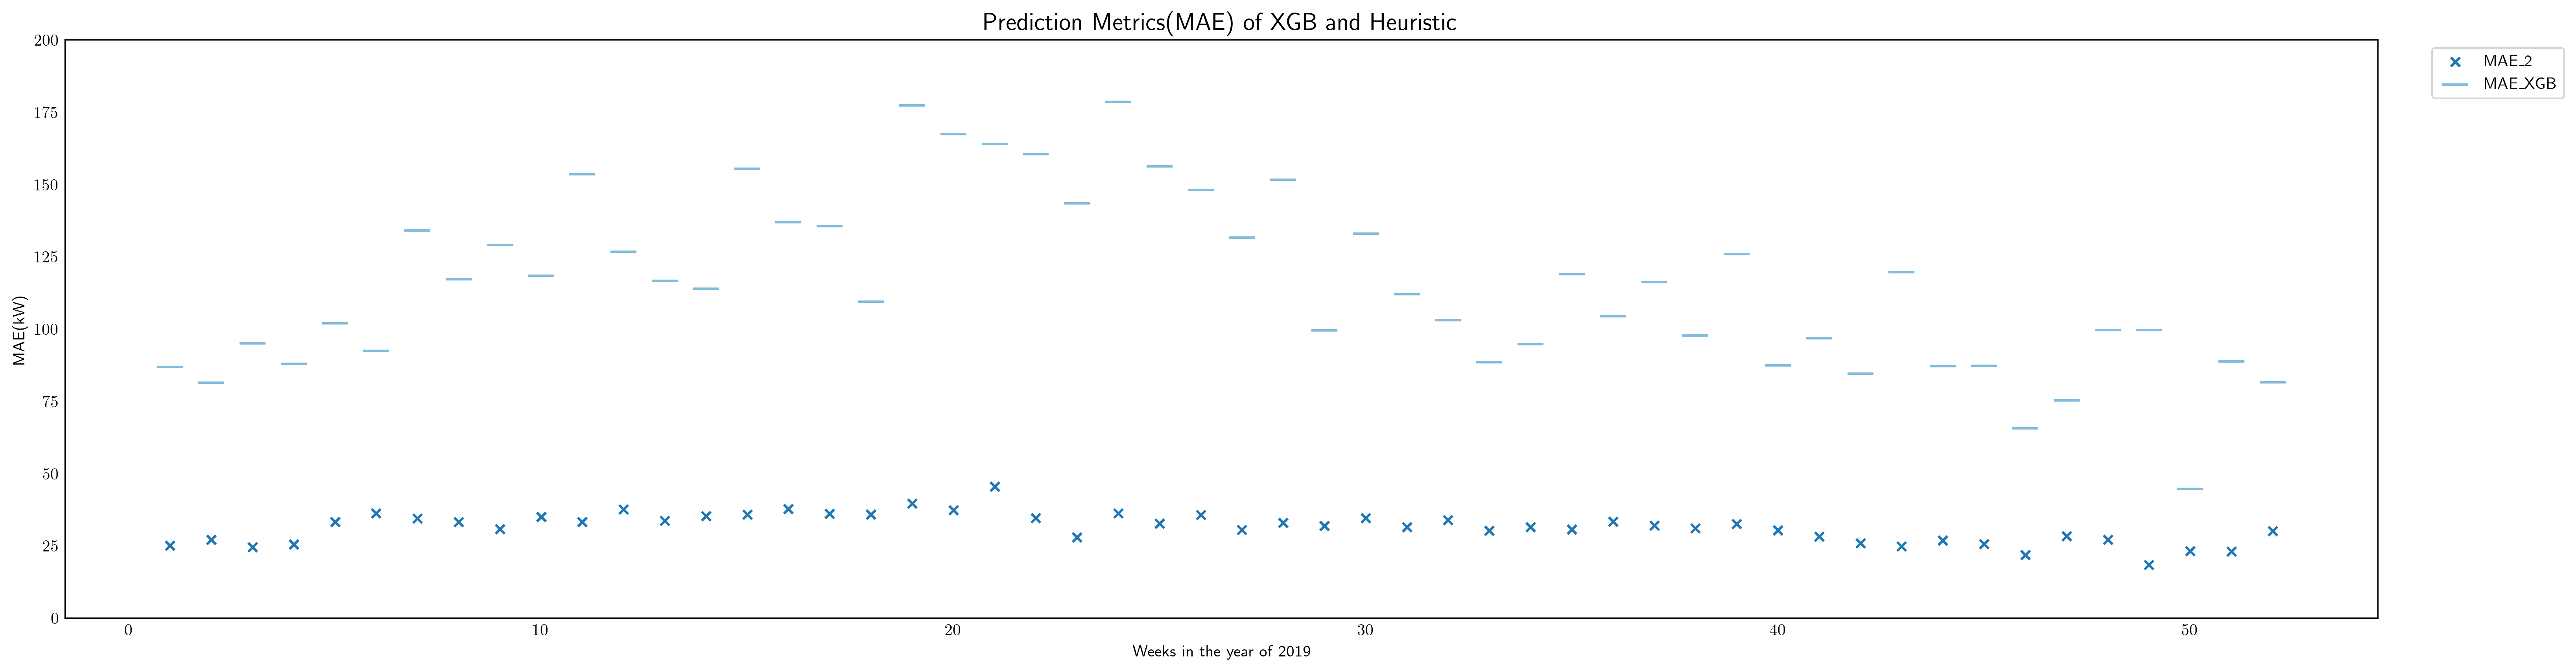

In [57]:
metric='MAE'
steps=[2]
limit=[0,200]
plot_eva_scatter(evanew.reset_index().copy(),metric,steps,limit)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_5732\1641810083.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.array(df['week_of_year']), np.array(df[g]*scale), label=g,\


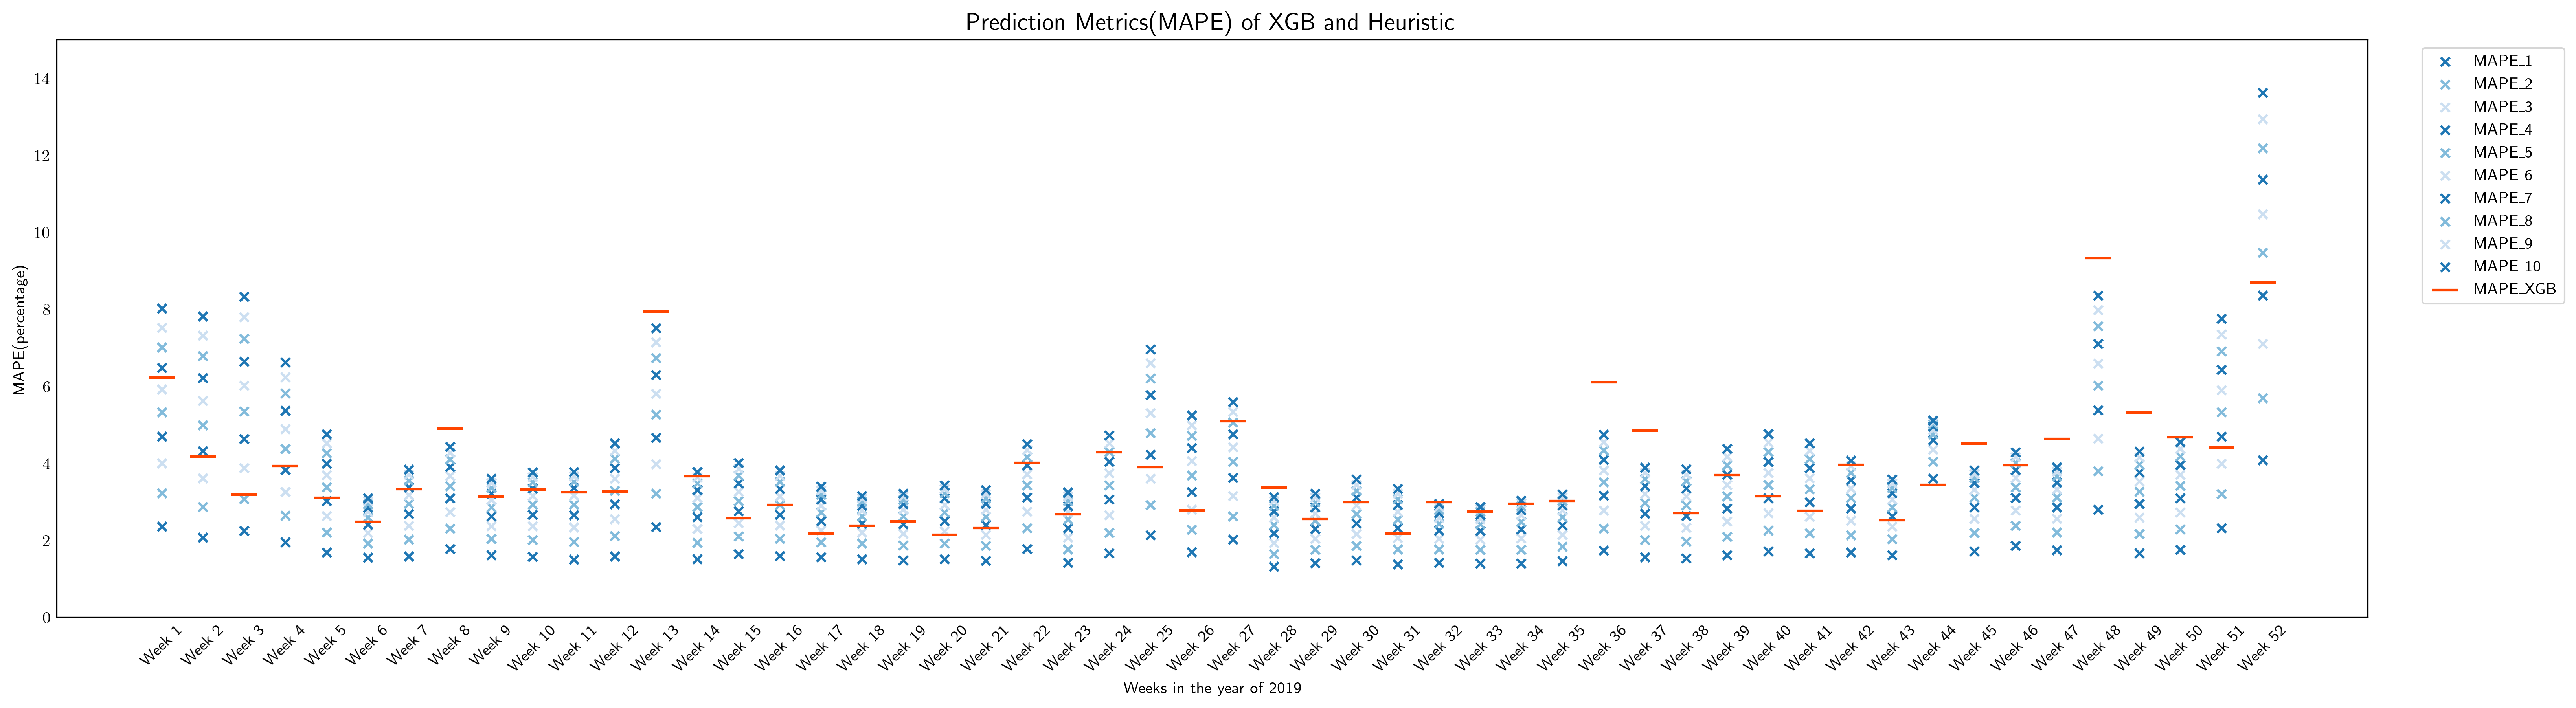

In [10]:
metric='MAPE'
steps=[1,2,3,4,5,6,7,8,9,10]
limit=[0,15]
plot_eva_scatter(eva.reset_index().copy(),metric,steps,limit)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_18824\1641810083.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.array(df['week_of_year']), np.array(df[g]*scale), label=g,\


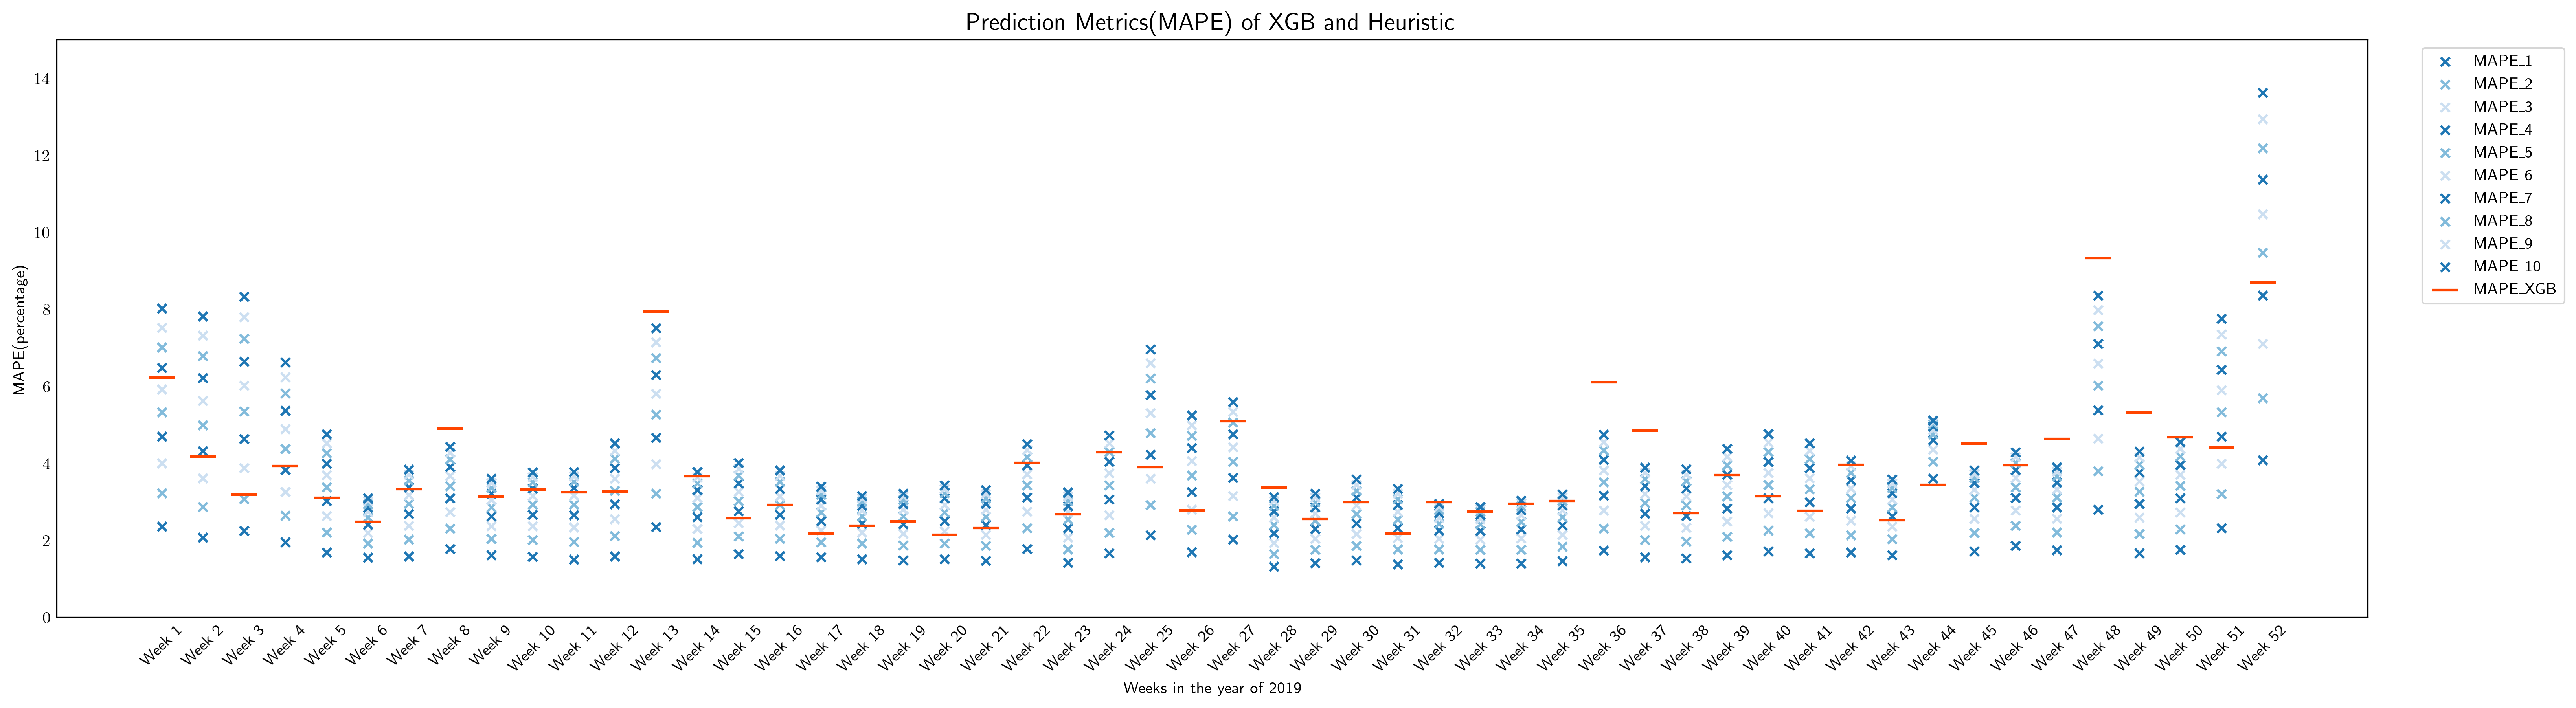

In [6]:
metric='MAPE'
steps=[1,2,3,4,5,6,7,8,9,10]
limit=[0,15]
plot_eva_scatter(eva.reset_index().copy(),metric,steps,limit)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_24724\3693241771.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.array(df['week_of_year']), np.array(df[g]*scale), label=g,\


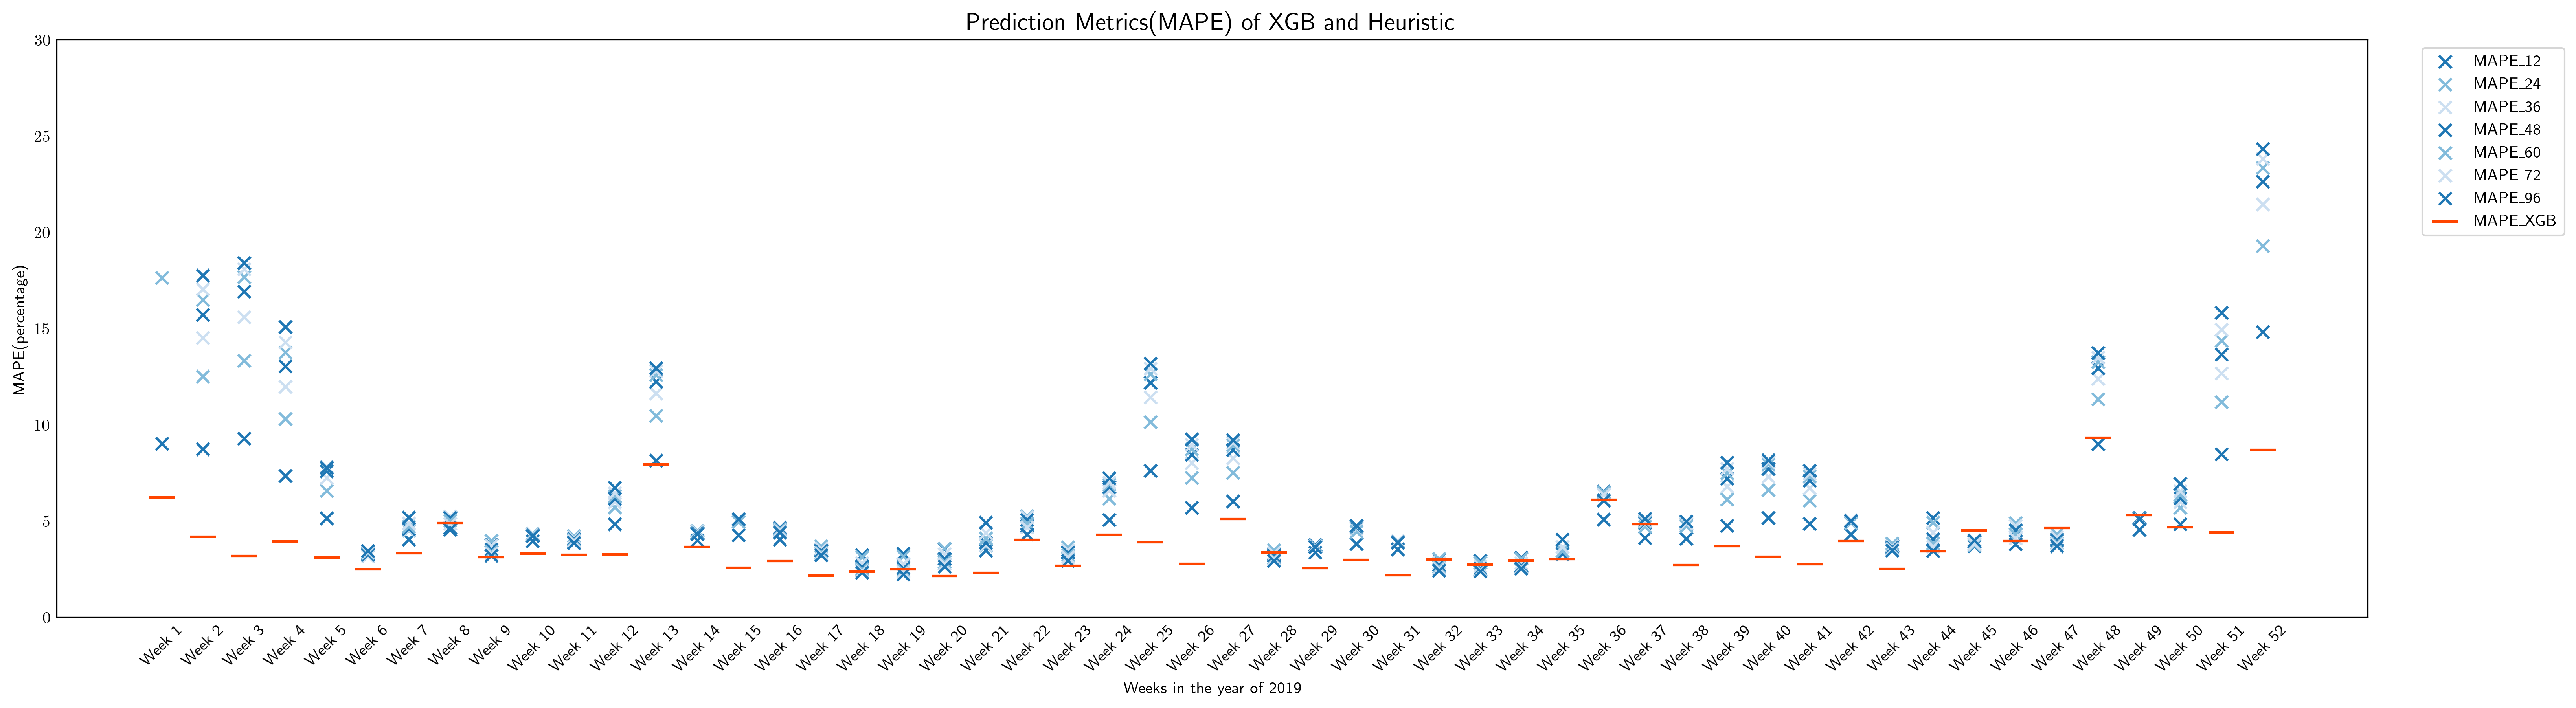

In [49]:
metric='MAPE'
steps=[12,24,36,48,60,72,96]
limit=[0,30]
plot_eva_scatter(eva.reset_index().copy(),metric,steps,limit)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_24724\3693241771.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.array(df['week_of_year']), np.array(df[g]*scale), label=g,\


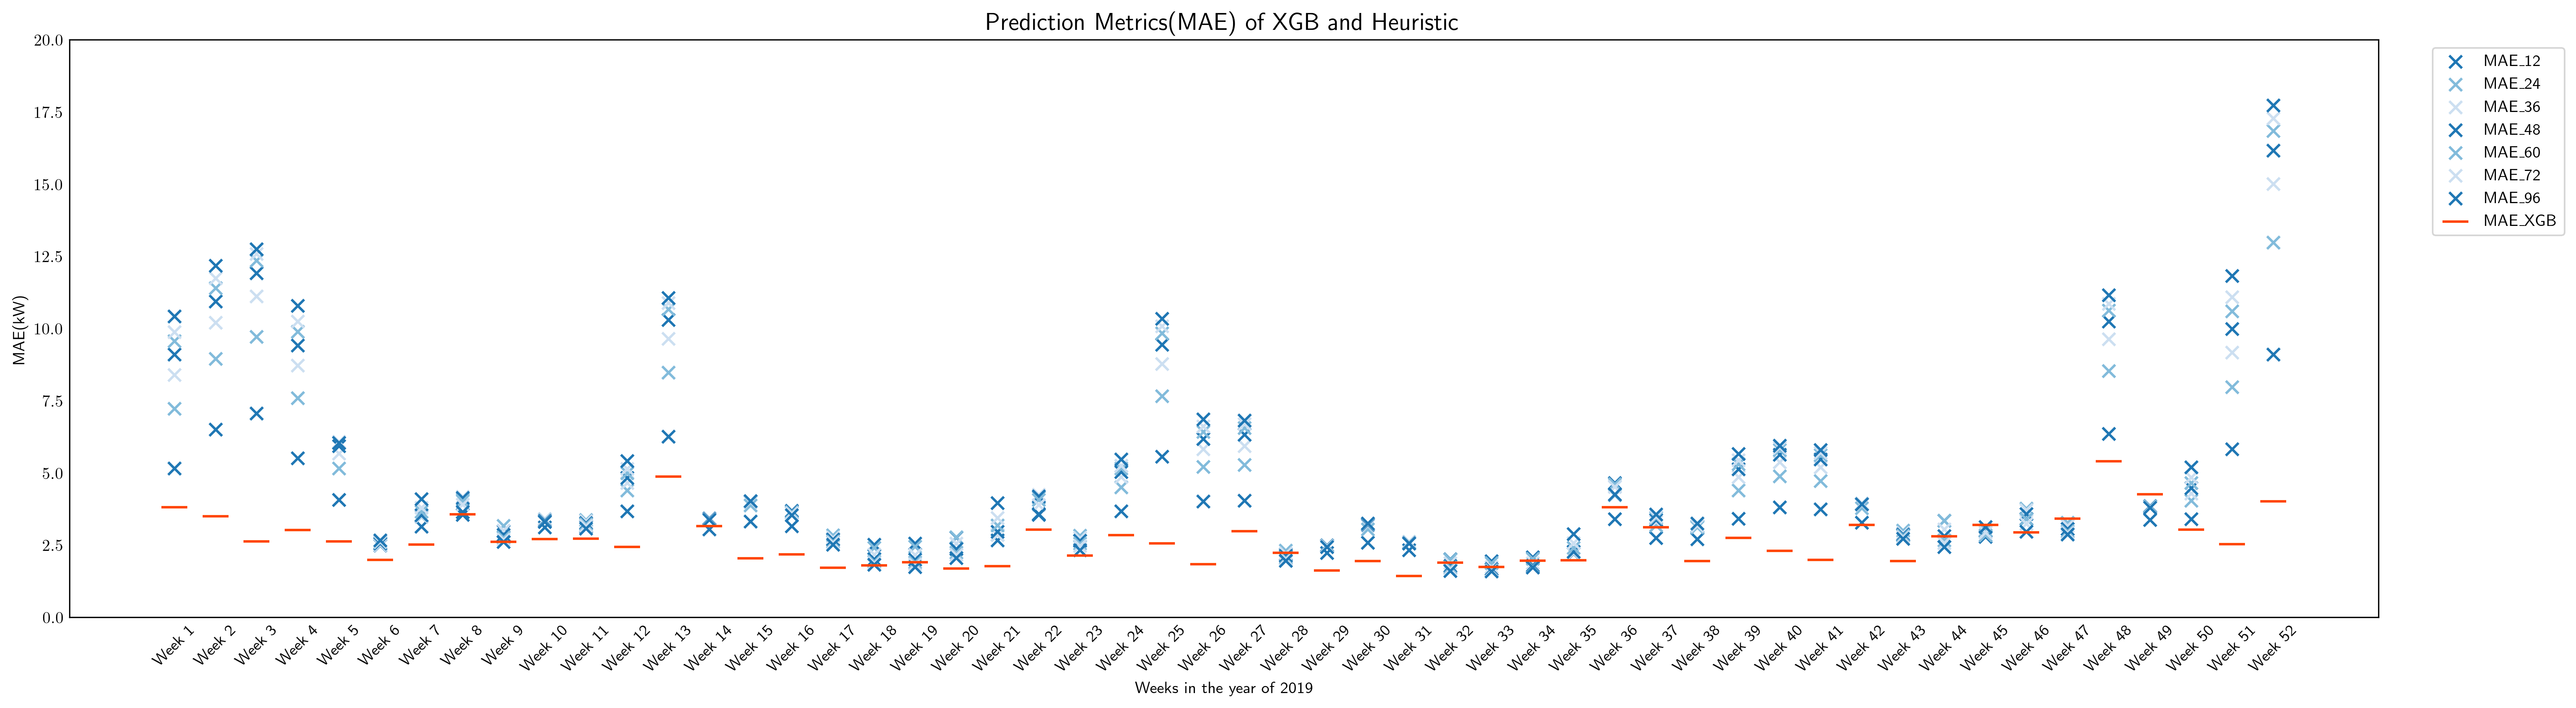

In [50]:
metric='MAE'
steps=[12,24,36,48,60,72,96]
limit=[0,20]
plot_eva_scatter(eva.reset_index().copy(),metric,steps,limit)

C:\Users\Lunlo\AppData\Local\Temp\ipykernel_24724\3693241771.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(np.array(df['week_of_year']), np.array(df[g]*scale), label=g,\


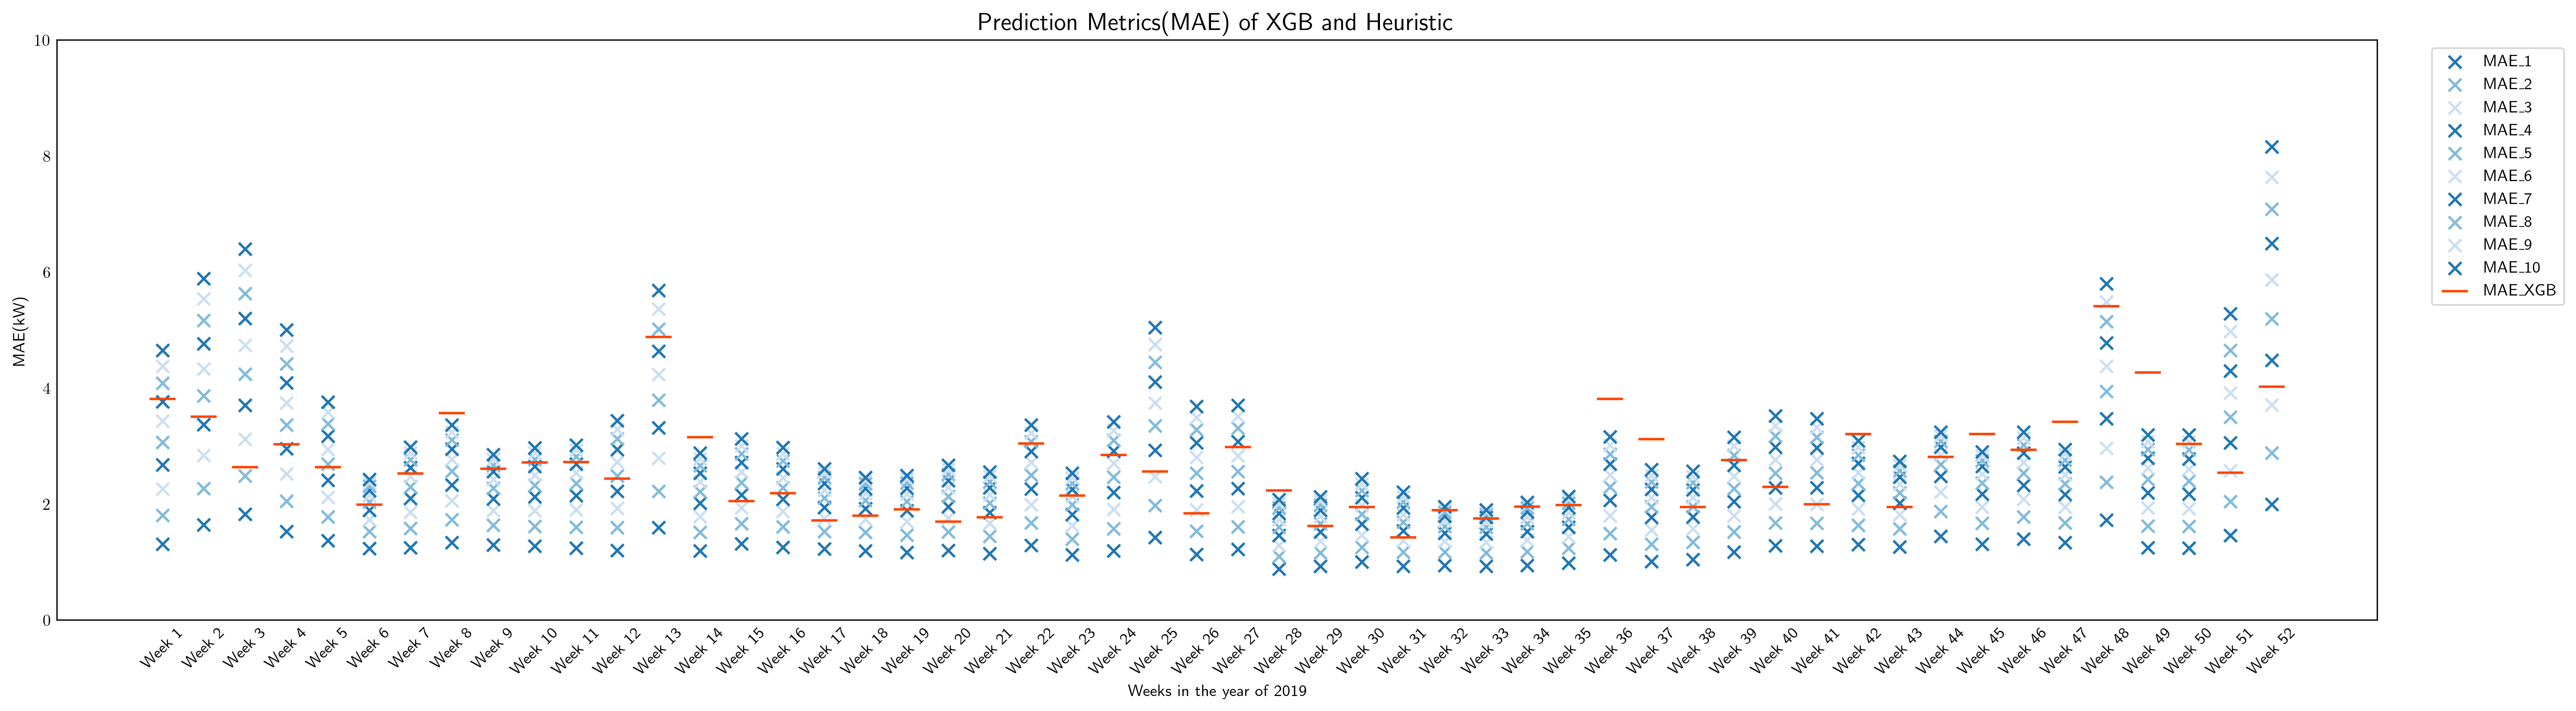

In [53]:
metric='MAE'
steps=[1,2,3,4,5,6,7,8,9,10]
limit=[0,10]
plot_eva_scatter(eva.reset_index().copy(),metric,steps,limit)

In [57]:
merged_df=pd.merge(opex,eva,on='week_of_year',how='inner')

In [58]:
merged_df_grouped=merged_df.groupby("label")

In [27]:
merged_df_grouped.get_group('MPC-Heuristic')

strategy pred_model week_of_year        OPEX          label  \
2        MPC  Heuristic            1  246.395900  MPC-Heuristic   
7        MPC  Heuristic            2  392.668735  MPC-Heuristic   
12       MPC  Heuristic            3  460.970540  MPC-Heuristic   
17       MPC  Heuristic            4  368.161066  MPC-Heuristic   
22       MPC  Heuristic            5         NaN  MPC-Heuristic   
27       MPC  Heuristic            6  393.900968  MPC-Heuristic   
32       MPC  Heuristic            7  418.361466  MPC-Heuristic   
37       MPC  Heuristic            8  385.296323  MPC-Heuristic   
42       MPC  Heuristic            9  381.427679  MPC-Heuristic   
47       MPC  Heuristic           10  399.354457  MPC-Heuristic   
52       MPC  Heuristic           11  360.520643  MPC-Heuristic   
57       MPC  Heuristic           12  312.947762  MPC-Heuristic   
62       MPC  Heuristic           13  215.252536  MPC-Heuristic   
67       MPC  Heuristic           14  336.822533  MPC-Heuristic   
72       MPC  Heuristic           15  306.471204  MPC-Heuristic   
77       MPC  Heuristic           16  346.718098  MPC-Heuristic   
82       MPC  Heuristic           17  306.348174  MPC-Heuristic   
87       MPC  Heuristic           18  352.375808  MPC-Heuristic   
92       MPC  Heuristic           19  387.604561  MPC-Heuristic   
97       MPC  Heuristic           20  367.903576  MPC-Heuristic   
102      MPC  Heuristic           21  341.112054  MPC-Heuristic   
107      MPC  Heuristic           22  326.304653  MPC-Heuristic   
112      MPC  Heuristic           23  404.038172  MPC-Heuristic   
117      MPC  Heuristic           24  311.416174  MPC-Heuristic   
122      MPC  Heuristic           25  294.467577  MPC-Heuristic   
127      MPC  Heuristic           26  272.038761  MPC-Heuristic   
132      MPC  Heuristic           27  156.027431  MPC-Heuristic   
137      MPC  Heuristic           28  244.853516  MPC-Heuristic   
142      MPC  Heuristic           29  242.748404  MPC-Heuristic   
147      MPC  Heuristic           30         NaN  MPC-Heuristic   
152      MPC  Heuristic           31  249.414815  MPC-Heuristic   
157      MPC  Heuristic           32  263.495045  MPC-Heuristic   
162      MPC  Heuristic           33  210.645900  MPC-Heuristic   
167      MPC  Heuristic           34  254.459595  MPC-Heuristic   
172      MPC  Heuristic           35  242.153407  MPC-Heuristic   
177      MPC  Heuristic           36  265.295423  MPC-Heuristic   
182      MPC  Heuristic           37  262.143599  MPC-Heuristic   
187      MPC  Heuristic           38  266.901228  MPC-Heuristic   
192      MPC  Heuristic           39  371.207252  MPC-Heuristic   
197      MPC  Heuristic           40  320.425222  MPC-Heuristic   
202      MPC  Heuristic           41  343.132042  MPC-Heuristic   
207      MPC  Heuristic           42  362.089373  MPC-Heuristic   
212      MPC  Heuristic           43  382.814702  MPC-Heuristic   
217      MPC  Heuristic           44  399.988582  MPC-Heuristic   
222      MPC  Heuristic           45         NaN  MPC-Heuristic   
227      MPC  Heuristic           46  414.084138  MPC-Heuristic   
232      MPC  Heuristic           47         NaN  MPC-Heuristic   
237      MPC  Heuristic           48  350.376182  MPC-Heuristic   
242      MPC  Heuristic           49         NaN  MPC-Heuristic   
247      MPC  Heuristic           50  380.525939  MPC-Heuristic   
252      MPC  Heuristic           51  320.368177  MPC-Heuristic   
257      MPC  Heuristic           52  198.609798  MPC-Heuristic   

     relative_OPEX  is_valid  RealPower  RealPower_before_scaling  \
2        57.812626      True  57.694079                576.940793   
7        43.539309     False  77.084008                770.840077   
12       11.705854     False  78.916673                789.166734   
17       63.465798      True  76.789226                767.892257   
22             NaN     False  80.812720                808.127199   
27      -10.184965     False  79.74693

In [67]:
def plot_scatter(df):
    color_dict={
        'MPC-GT':'seagreen',
        'MPC-Prediction':'navy',
        'MPC-Heuristic':'steelblue',
        'MPC-Naive':'gainsboro',
        'MSC-GT':'orangered',
        'MSC-Naive':'grey'
    }
    maker_dict={
        'MPC-GT':'_',
        'MPC-Prediction':'_',
        'MPC-Heuristic':'_',
        'MPC-Naive':'_',
        'MSC-GT':'_',
        'MSC-Naive':'_'
    }

    fig,ax=plt.subplots(figsize=(9,9))

    metric='MAPE'

    '''
    group=np.array(df['label'])
    label_x=[]
    for i in scatter_x: 
        label_x.append('Week '+str(i))
    ax.set_xticks(ticks=scatter_x)
    ax.set_xticklabels(labels=label_x,fontsize=10,rotation=45)
    '''
    
    color_list={
        'MAPE_4':'seagreen',
        #'MAPE_2':'navy',
        #'MAPE_3':'steelblue',
        #'MAPE_4':'gainsboro',
        #'MAPE_5':'orangered',
        #'MAPE_6':'grey'
        }

    for i in color_list.keys():    
        ax.scatter(np.array(df[i])*100, df[new_key],\
                marker='.',s=150,c=color_list[i])
    ax.set_ylim([-20,120])
    ax.legend(color_list.keys())
    
    ax.set_xlabel("MAPE(Percentage)",fontsize=10)
    ax.set_ylabel("Relative OPEX",fontsize=10)


    ax.set_title("Prediction Metrics("+metric+") of Heuristic and Relative OPEX",fontsize=15)

    '''
    ax.set_title("Relative OPEX of Different Models",fontsize=15)
    ax.text(s="Notes: 1. OPEX under MPC-GT is marked as lower bound while MSC_GT marked as upper bound.",
            fontsize=12,
            x=0,
            y=-65
            )
        
    '''
    #ax.grid(True)
    plt.show()

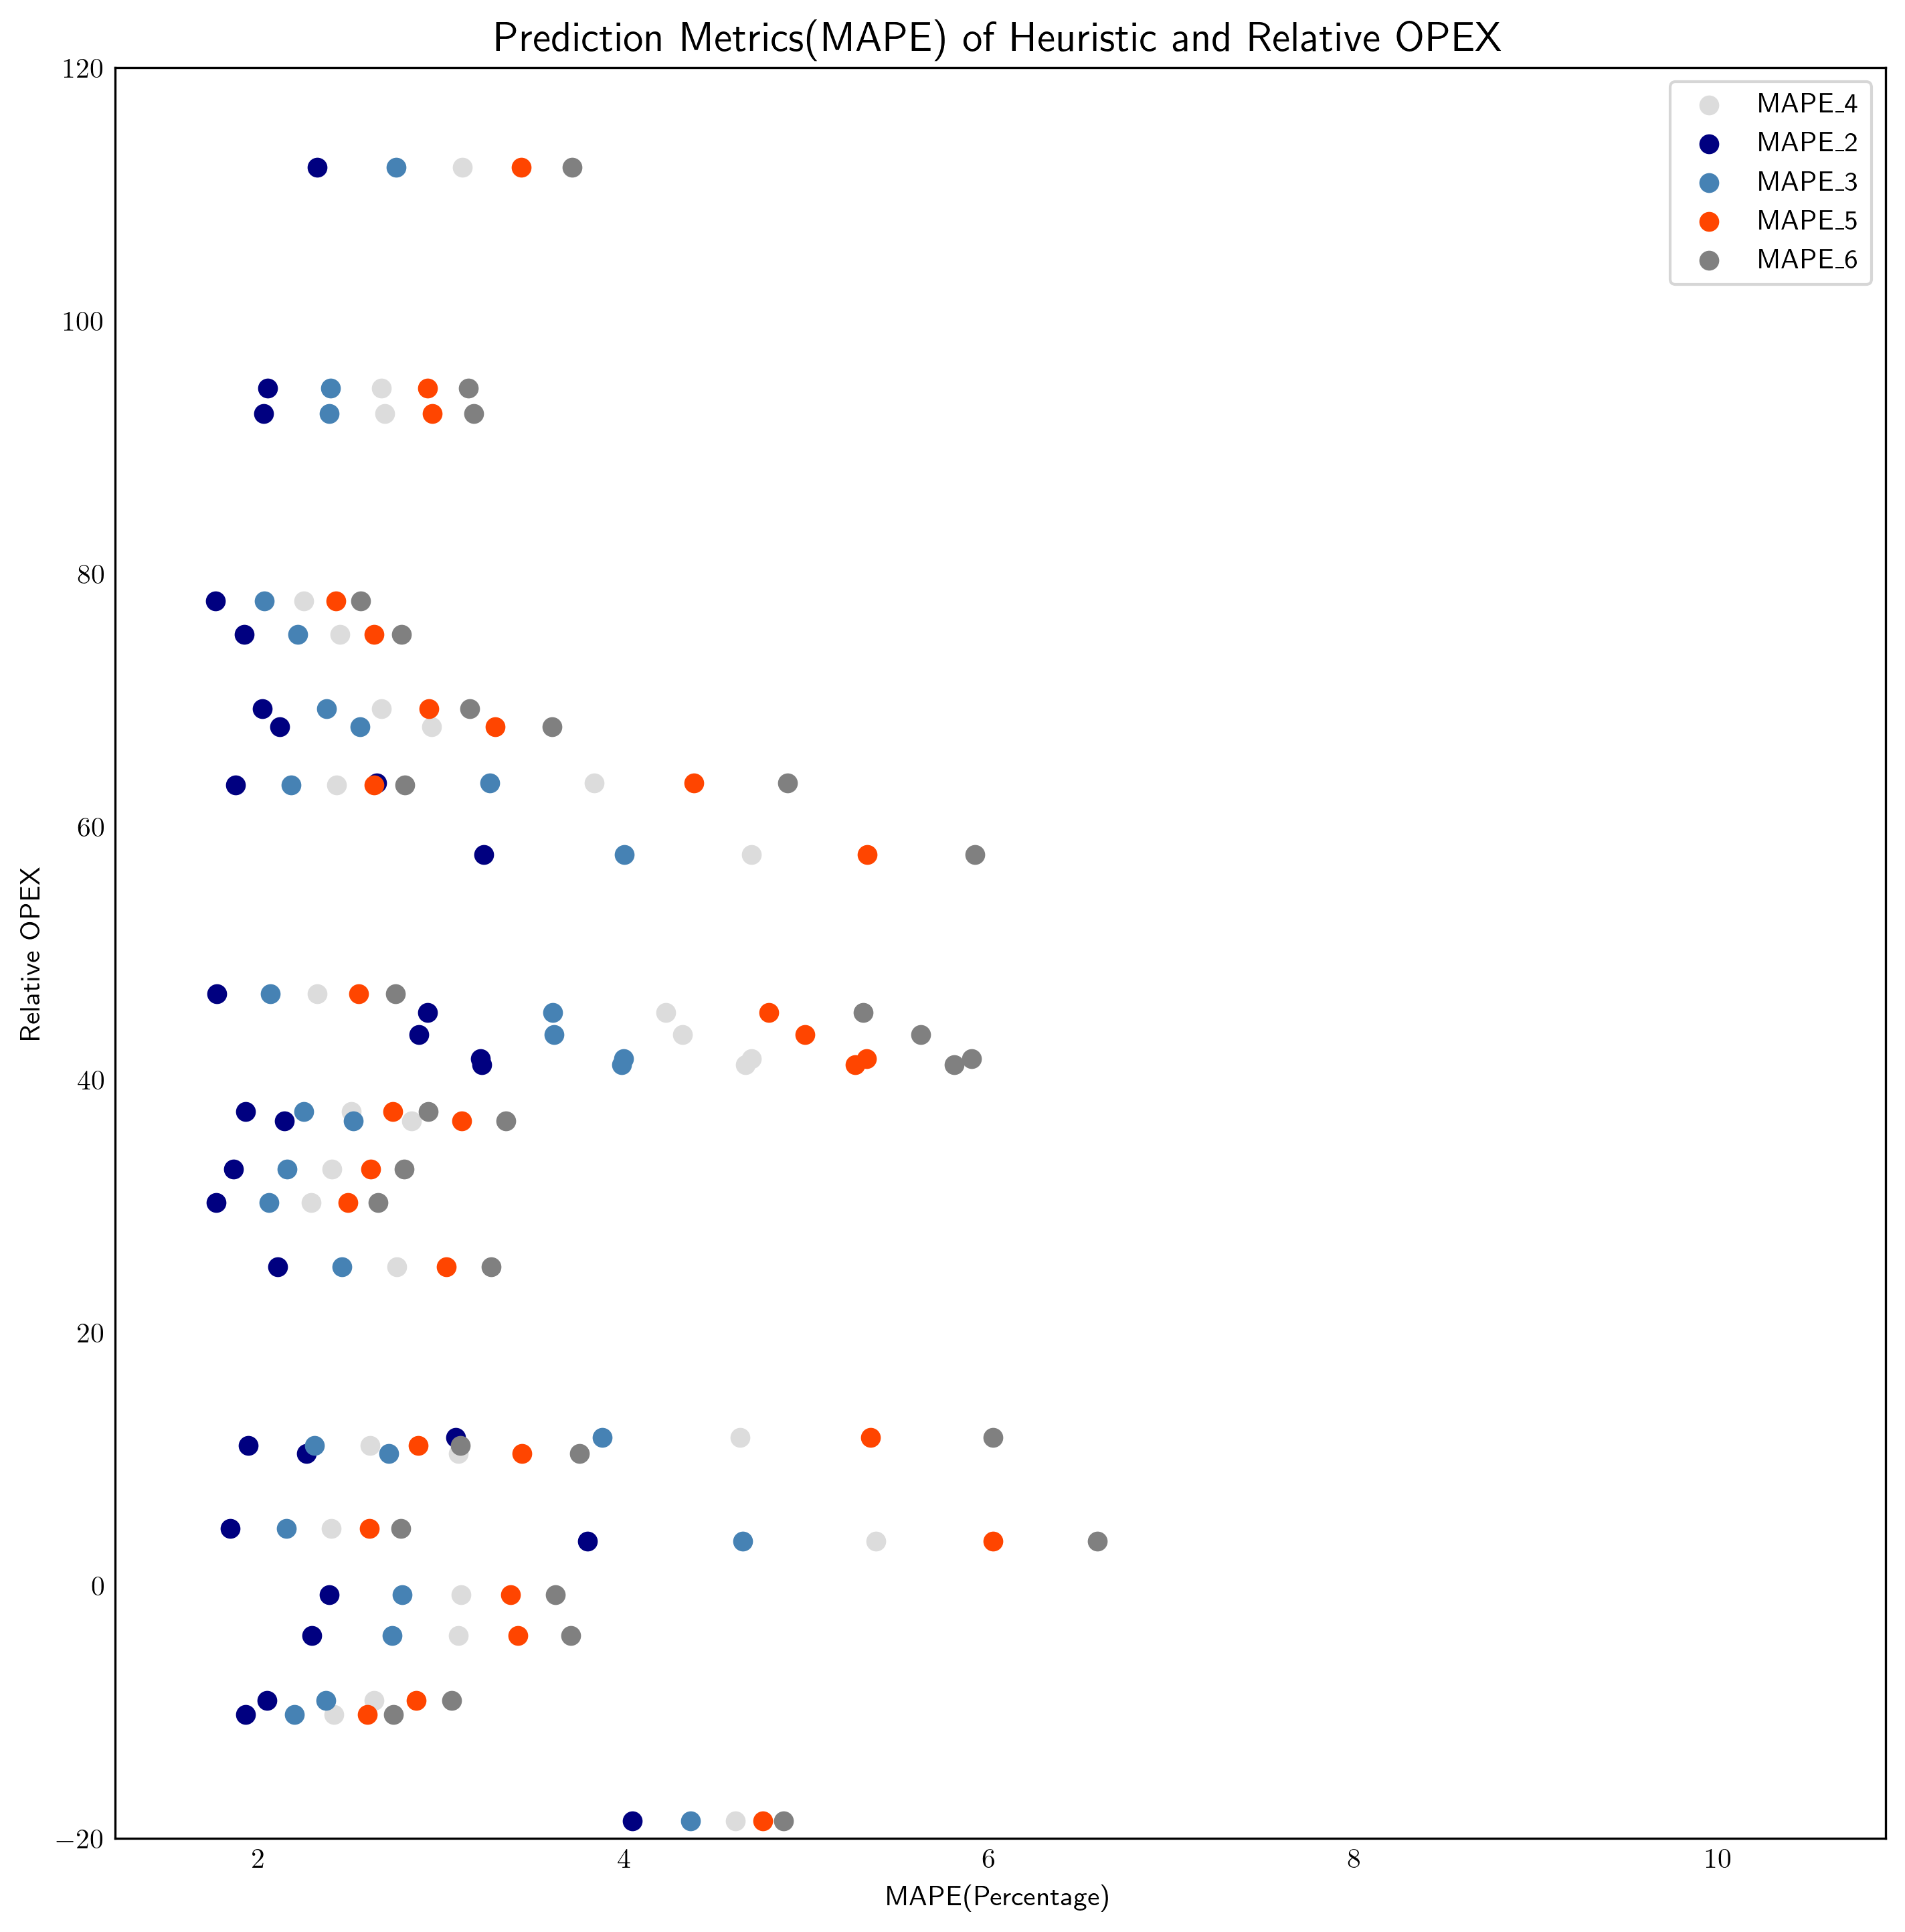

In [65]:
plot_scatter(merged_df_grouped.get_group('MPC-Heuristic'))

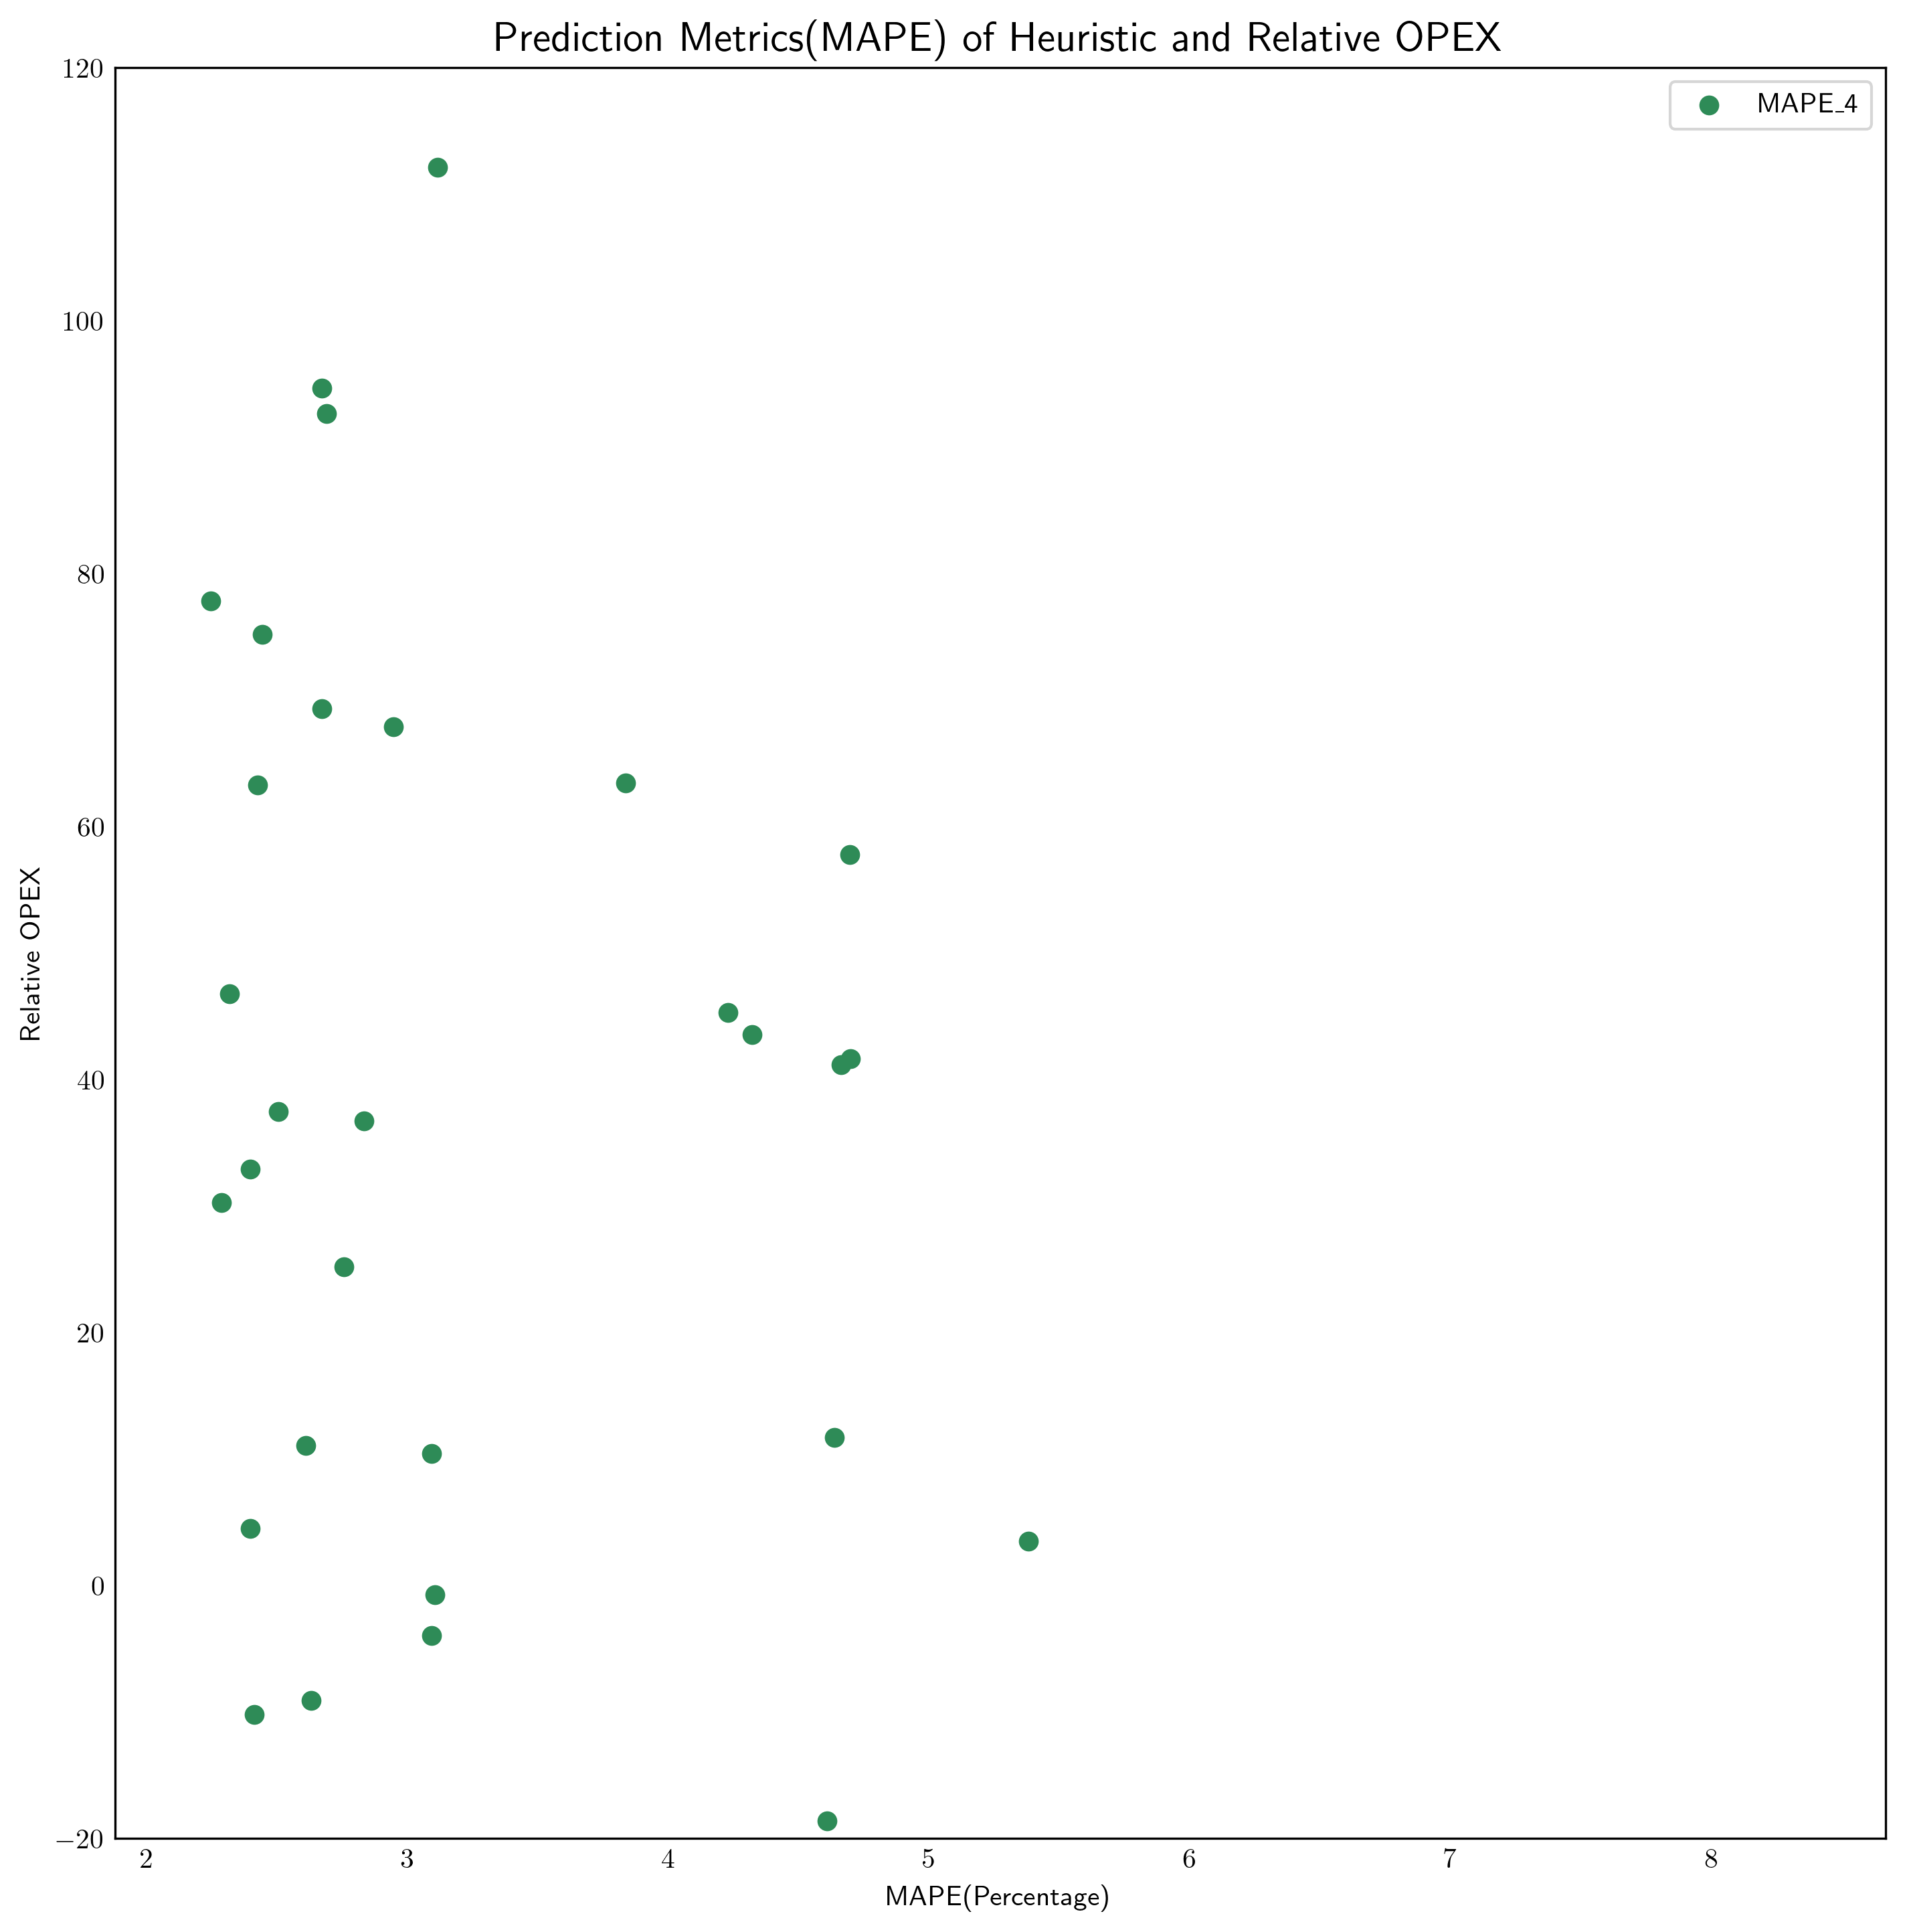

: 

In [68]:
plot_scatter(merged_df_grouped.get_group('MPC-Heuristic'))